In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

In [2]:
import os
os.getcwd()

'C:\\Users\\Ananth\\Downloads\\Advanced Statistics\\Week 3'

In [3]:
os.chdir('C:/Users/Ananth/Downloads/Advanced Statistics/Week 3/Project')

In [5]:
df = pd.read_csv('Fever.csv')
df.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [9]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [11]:
# 1.2.)
formula = 'Relief ~ C(A)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [ ]:
# The value of alpha is not mentioned. Hence we take it as 5% or 0.05. 
# Since the p value is less than alpha, we reject the null hypothesis.

In [12]:
# 1.3.)
formula = 'Relief ~ C(B)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [ ]:
# Since the p value is less than alpha, we reject the null hypothesis.

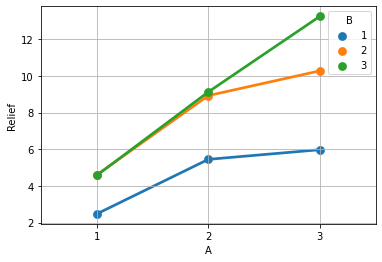

In [16]:
# 1.4.)
sns.pointplot(x = 'A', y = 'Relief', hue = 'B', data = df, ci = None)
plt.grid()
plt.show()

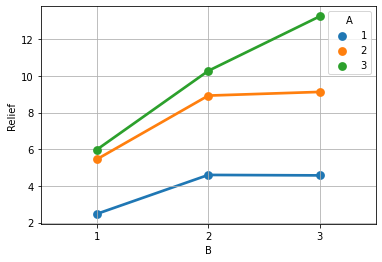

In [6]:
sns.pointplot(x = 'B', y = 'Relief', hue = 'A', data = df, ci = None)
plt.grid()
plt.show()

In [20]:
# 1.5.)
model = ols('Relief ~ C(A) + C(B) + C(A):C(B)',data=df).fit()
aov_table = anova_lm(model)
aov_table            


df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN

In [20]:
# 2.1.)
# importing the dataframe:
edu = pd.read_csv('Education+-+Post+12th+Standard.csv')
edu.head()
# Depending on the intention: Either Enroll or Grad.Rate can be the target variable

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [9]:
edu.shape

(777, 18)

In [10]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [11]:
edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [12]:
edu.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [ ]:
# Here we can see that for the Apps, Accept and Enroll variables, there are high values between the 50th percentile and the 75th percentile. And between the 75th percentile and the max value the data is very large.

In [18]:
# Checking for duplicates:
dupes = edu.duplicated()
print(' The number of duplicate rows is %d' % (dupes.sum()))
edu[dupes]

 The number of duplicate rows is 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

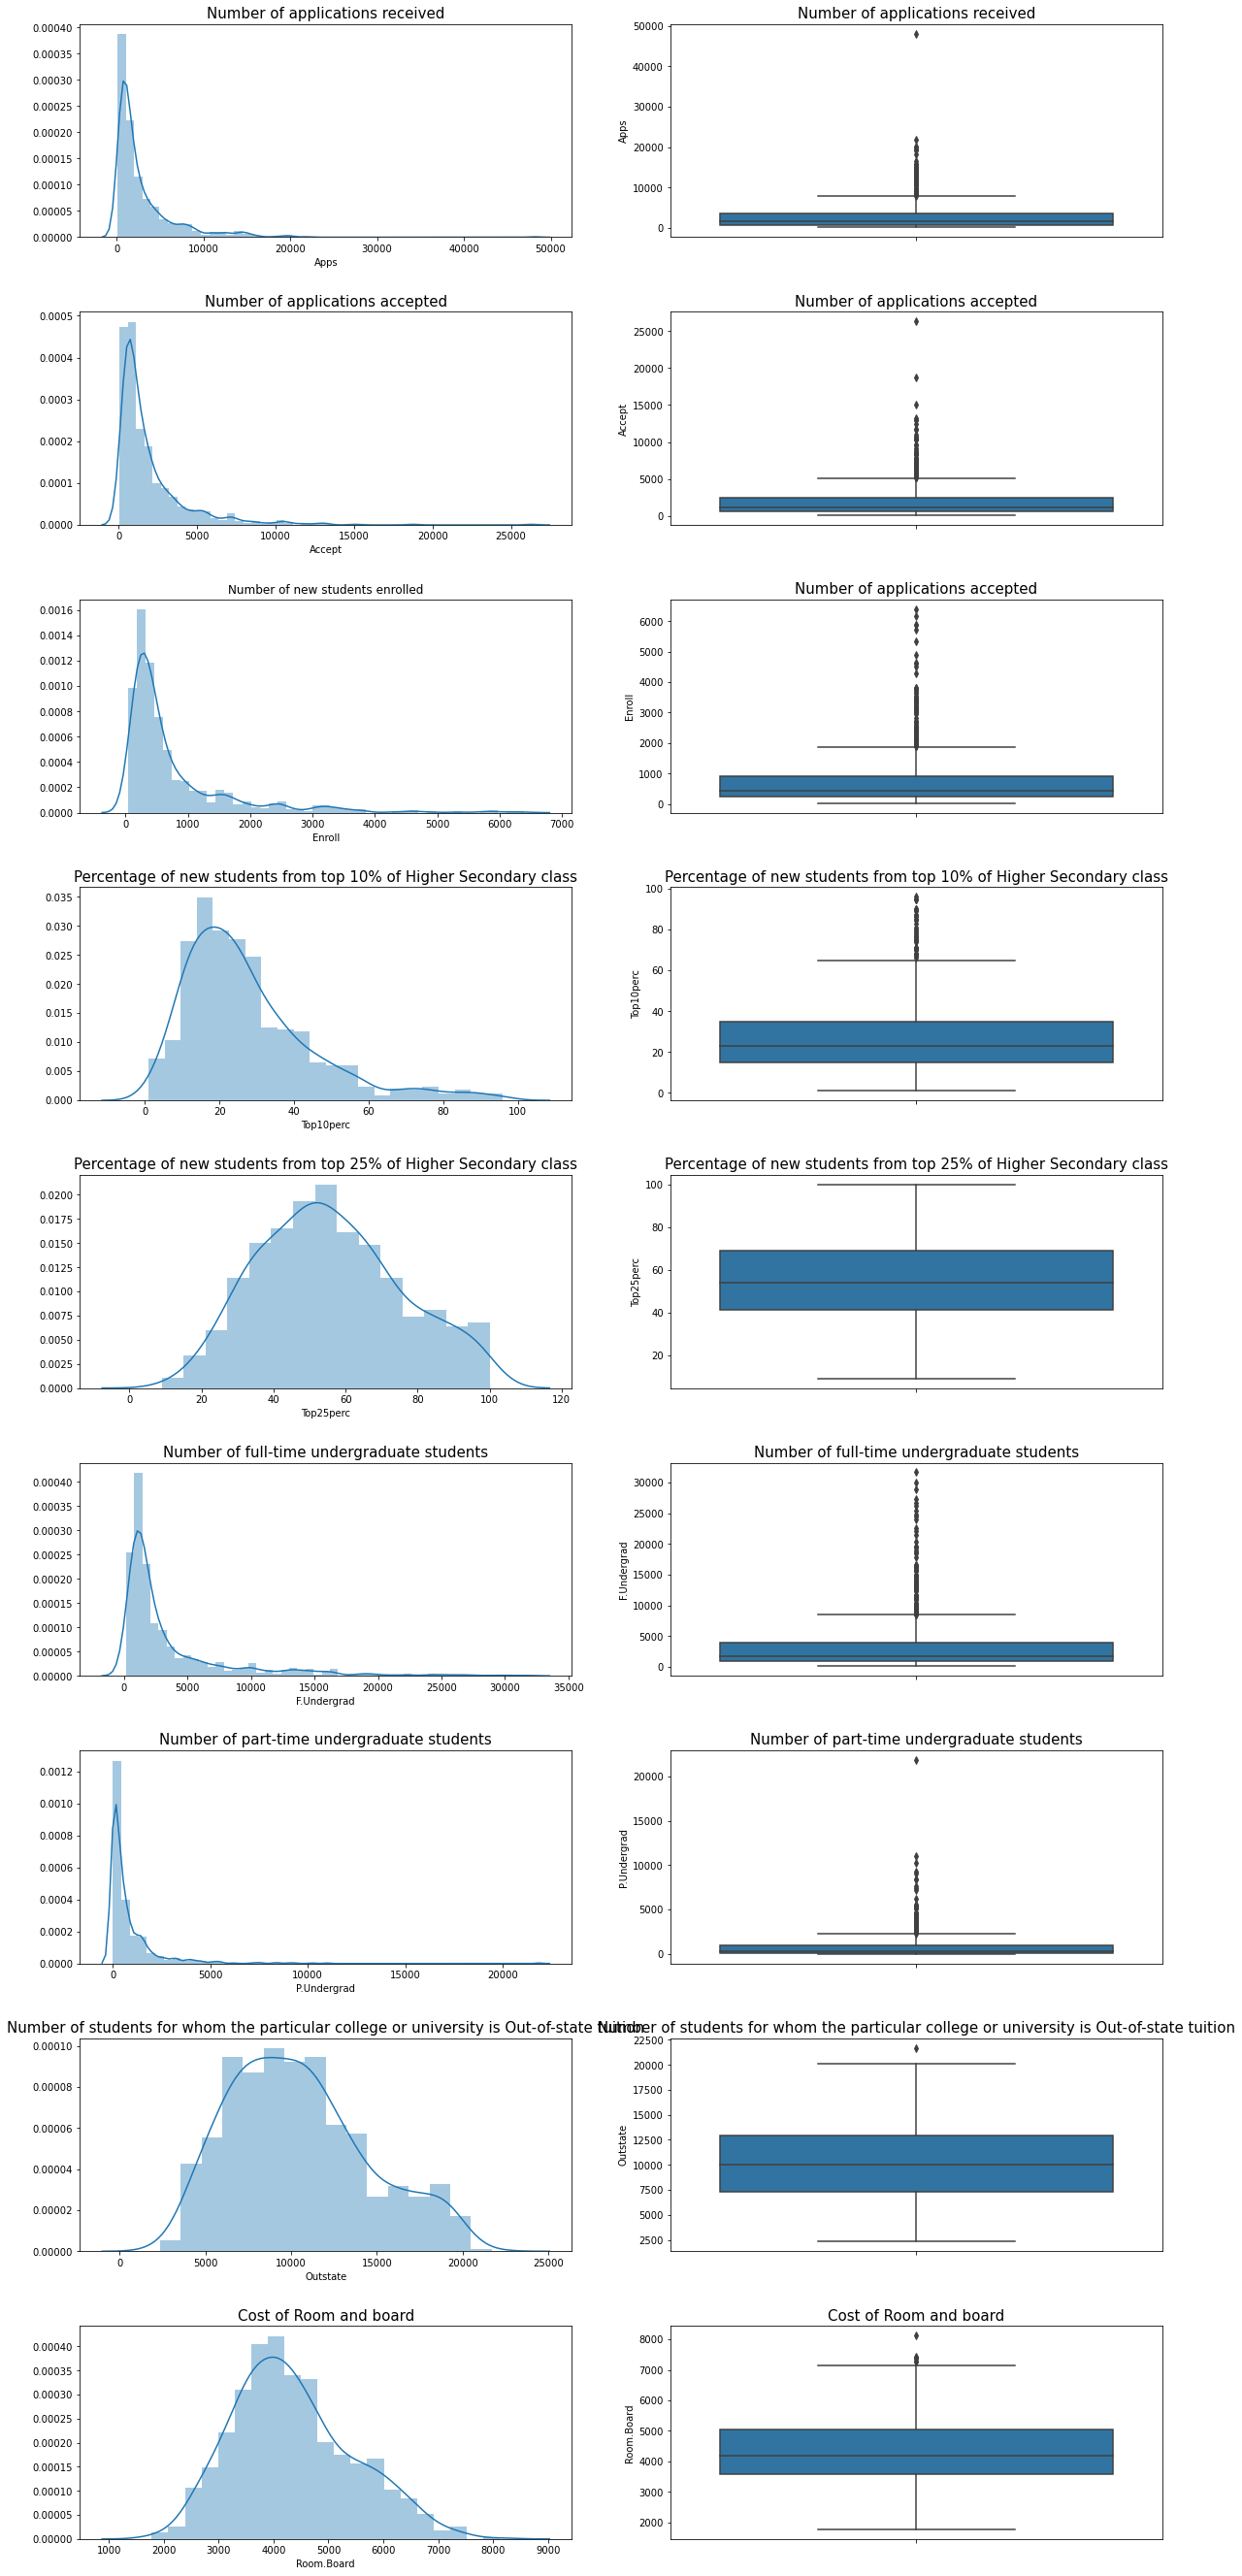

In [27]:
# 2.1: Univariate Analysis:
fig,axes = plt.subplots(nrows=9, ncols=2)
fig.set_size_inches(20,45)
a = sns.distplot(edu['Apps'], ax=axes[0][0])
a.set_title("Number of applications received", fontsize = 15)
a = sns.boxplot(edu['Apps'], orient = "v", ax = axes[0][1])
a.set_title("Number of applications received", fontsize = 15)

a = sns.distplot(edu['Accept'], ax=axes[1][0])
a.set_title("Number of applications accepted", fontsize = 15)
a = sns.boxplot(edu['Accept'], orient = "v", ax = axes[1][1])
a.set_title("Number of applications accepted", fontsize = 15)

a = sns.distplot(edu['Enroll'], ax=axes[2][0])
a.set_title("Number of new students enrolled")
a = sns.boxplot(edu['Enroll'], orient = "v", ax=axes[2][1])
a.set_title("Number of applications accepted", fontsize = 15)

a = sns.distplot(edu['Top10perc'], ax=axes[3][0])
a.set_title("Percentage of new students from top 10% of Higher Secondary class", fontsize = 15)
a = sns.boxplot(edu['Top10perc'],orient = "v",ax=axes[3][1])
a.set_title("Percentage of new students from top 10% of Higher Secondary class", fontsize = 15)

a = sns.distplot(edu['Top25perc'], ax=axes[4][0])
a.set_title("Percentage of new students from top 25% of Higher Secondary class", fontsize = 15)
a = sns.boxplot(edu['Top25perc'],orient = "v", ax=axes[4][1])
a.set_title("Percentage of new students from top 25% of Higher Secondary class", fontsize = 15)

a = sns.distplot(edu['F.Undergrad'], ax=axes[5][0])
a.set_title("Number of full-time undergraduate students", fontsize = 15)
a = sns.boxplot(edu['F.Undergrad'],orient = "v", ax=axes[5][1])
a.set_title("Number of full-time undergraduate students", fontsize = 15)

a = sns.distplot(edu['P.Undergrad'], ax=axes[6][0])
a.set_title("Number of part-time undergraduate students", fontsize = 15)
a = sns.boxplot(edu['P.Undergrad'],orient = "v", ax=axes[6][1])
a.set_title("Number of part-time undergraduate students", fontsize = 15)

a = sns.distplot(edu['Outstate'], ax=axes[7][0])
a.set_title("Number of students for whom the particular college or university is Out-of-state tuition", fontsize = 15)
a = sns.boxplot(edu['Outstate'],orient = "v", ax=axes[7][1])
a.set_title("Number of students for whom the particular college or university is Out-of-state tuition", fontsize = 15)

a = sns.distplot(edu['Room.Board'], ax=axes[8][0])
a.set_title("Cost of Room and board", fontsize = 15)
a = sns.boxplot(edu['Room.Board'],orient = "v", ax=axes[8][1])
a.set_title("Cost of Room and board", fontsize = 15)
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.35)
plt.show()

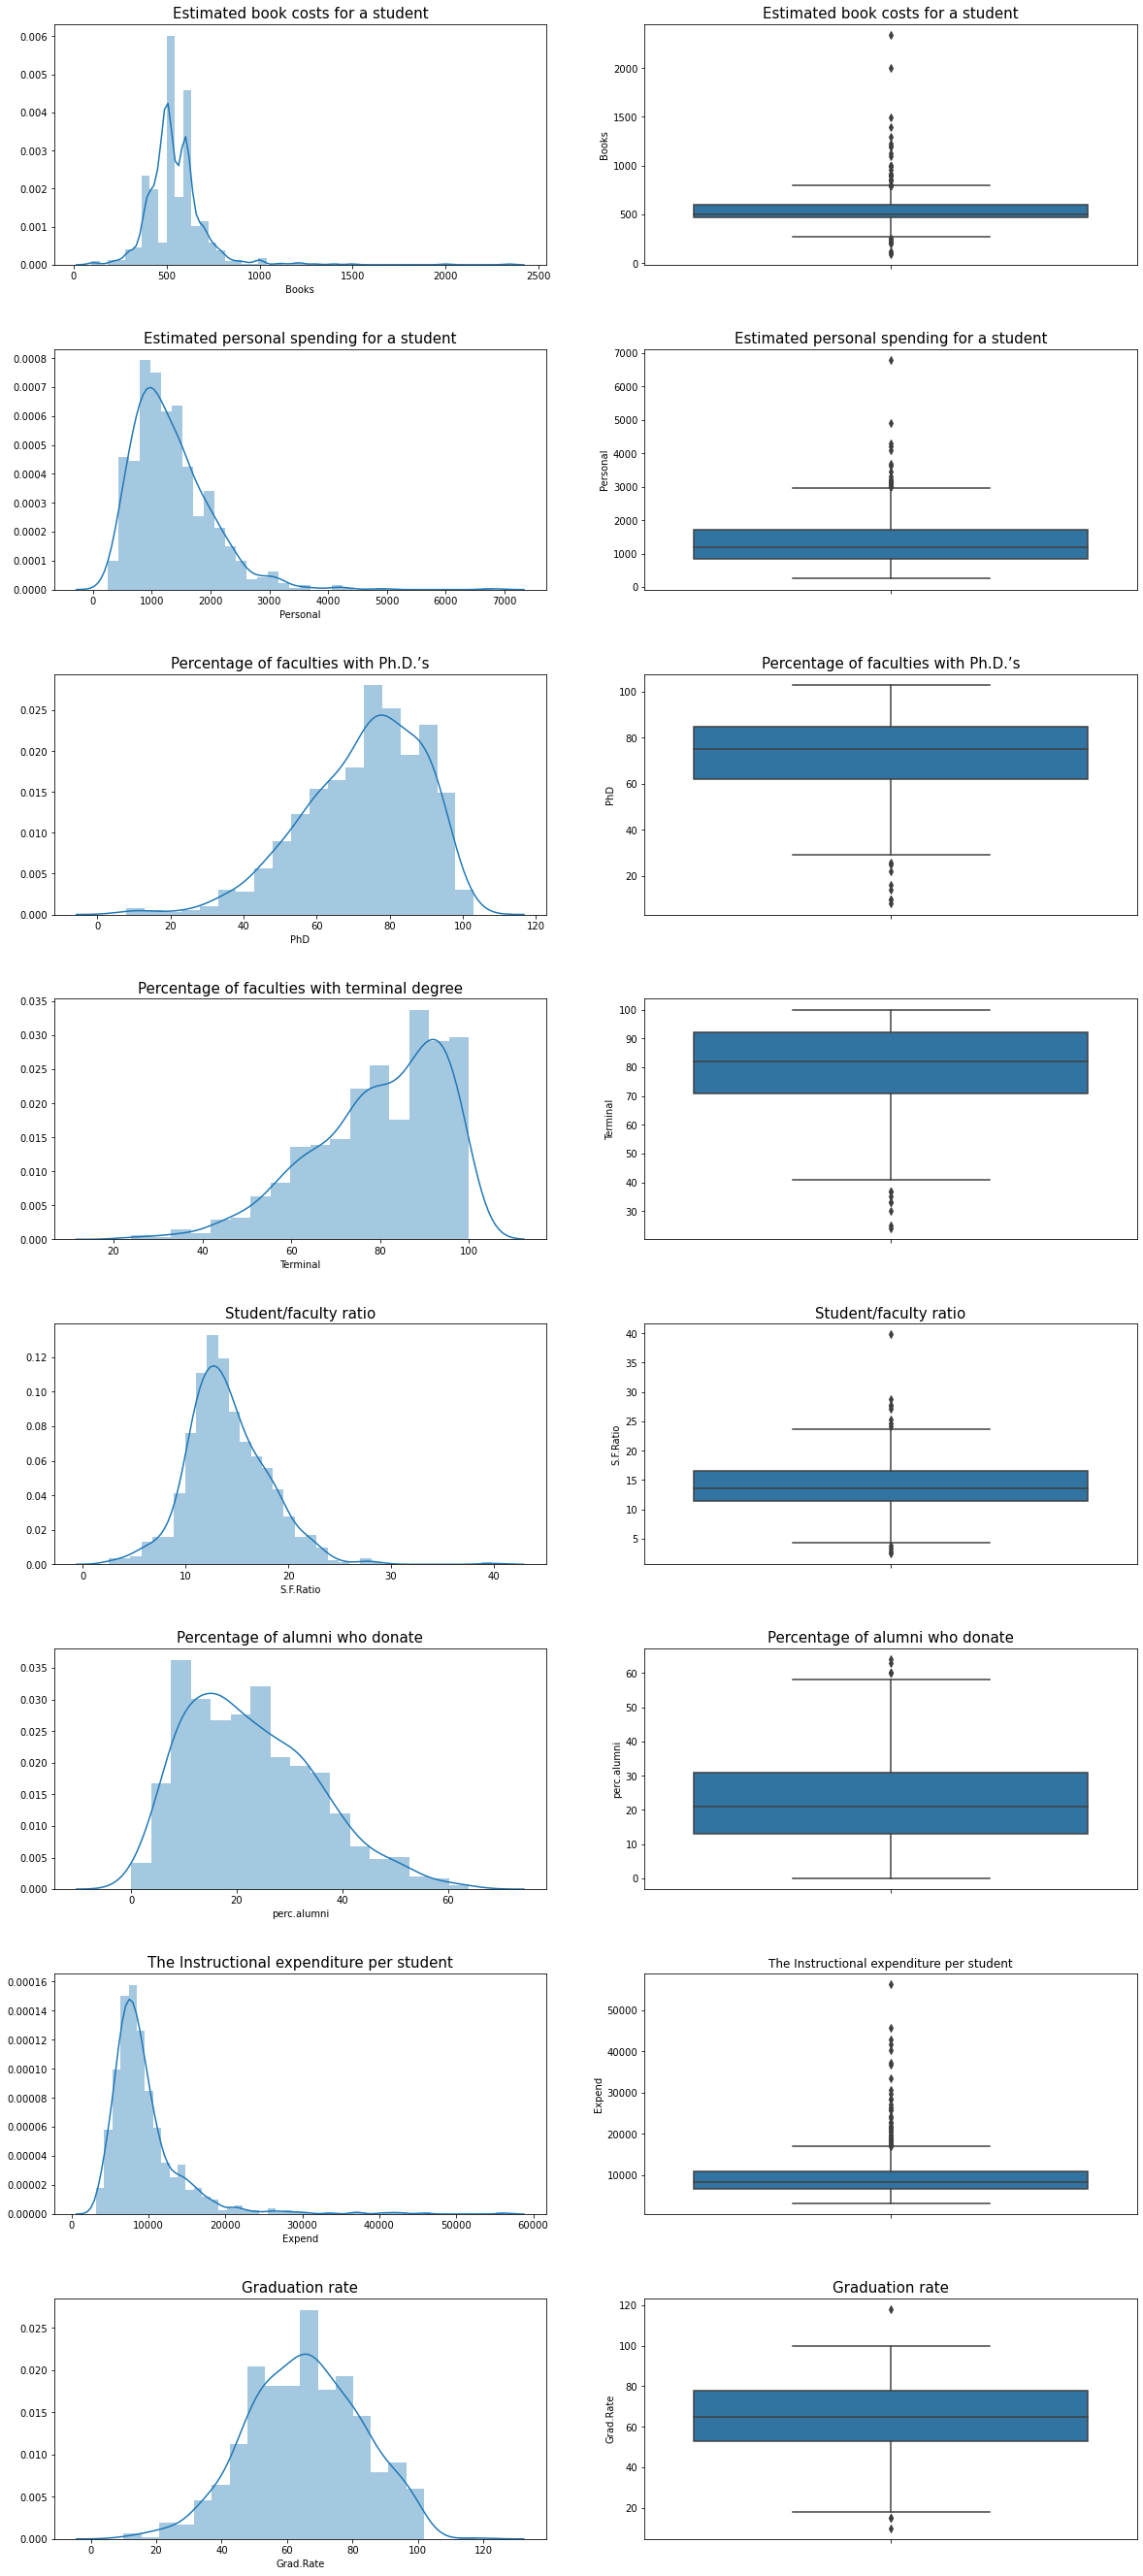

In [28]:
fig,axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(20,45)
fig.tight_layout()
a = sns.distplot(edu['Books'], ax=axes[0][0])
a.set_title("Estimated book costs for a student", fontsize=15)
a = sns.boxplot(edu['Books'], orient = "v", ax=axes[0][1])
a.set_title("Estimated book costs for a student", fontsize=15)

a = sns.distplot(edu['Personal'], ax=axes[1][0])
a.set_title("Estimated personal spending for a student", fontsize = 15)
a = sns.boxplot(edu['Personal'], orient = "v", ax=axes[1][1])
a.set_title("Estimated personal spending for a student", fontsize = 15)

a = sns.distplot(edu['PhD'], ax=axes[2][0])
a.set_title("Percentage of faculties with Ph.D.’s", fontsize = 15)
a = sns.boxplot(edu['PhD'], orient = "v", ax=axes[2][1])
a.set_title("Percentage of faculties with Ph.D.’s", fontsize = 15)

a = sns.distplot(edu['Terminal'], ax=axes[3][0])
a.set_title("Percentage of faculties with terminal degree", fontsize = 15)
a = sns.boxplot(edu['Terminal'], orient = "v", ax=axes[3][1])

a = sns.distplot(edu['S.F.Ratio'], ax=axes[4][0])
a.set_title("Student/faculty ratio", fontsize = 15)
a = sns.boxplot(edu['S.F.Ratio'], orient = "v", ax=axes[4][1])
a.set_title("Student/faculty ratio", fontsize = 15)

a = sns.distplot(edu['perc.alumni'], ax=axes[5][0])
a.set_title("Percentage of alumni who donate", fontsize=15)
a = sns.boxplot(edu['perc.alumni'], orient = "v", ax=axes[5][1])
a.set_title("Percentage of alumni who donate", fontsize=15)

a = sns.distplot(edu['Expend'], ax=axes[6][0])
a.set_title("The Instructional expenditure per student", fontsize = 15)
a = sns.boxplot(edu['Expend'], orient = "v", ax=axes[6][1])
a.set_title("The Instructional expenditure per student")

a = sns.distplot(edu['Grad.Rate'], ax=axes[7][0])
a.set_title("Graduation rate", fontsize = 15)
a = sns.boxplot(edu['Grad.Rate'], orient = "v", ax=axes[7][1])
a.set_title("Graduation rate", fontsize = 15)
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.35)
plt.show()

In [ ]:
# Bivariate Analysis: 
# Let us keep Graduation Rate and the number of new students enrolled as the target variable:
# Let us plot a scatter plot for each of the variables with these target variables:


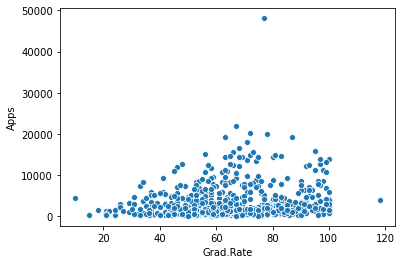

In [5]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Apps', data = edu)

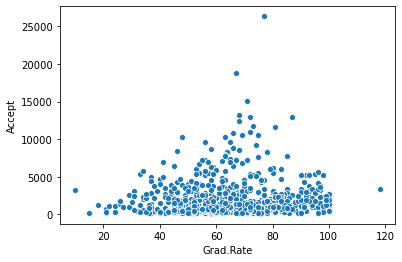

In [6]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Accept', data = edu)

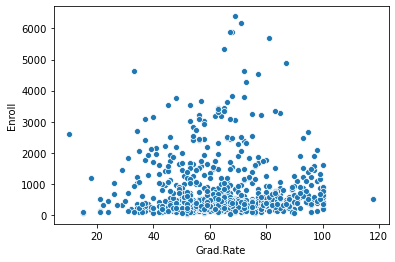

In [7]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Enroll', data = edu)

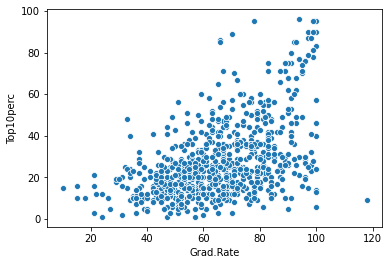

In [8]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Top10perc', data = edu)

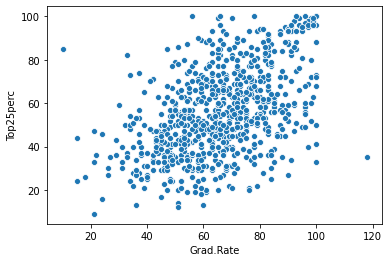

In [9]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Top25perc', data = edu)

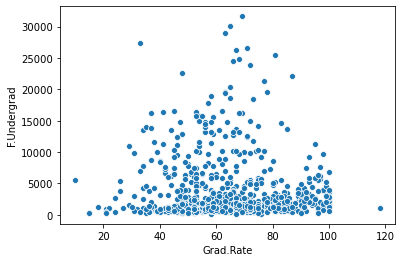

In [10]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'F.Undergrad', data = edu)

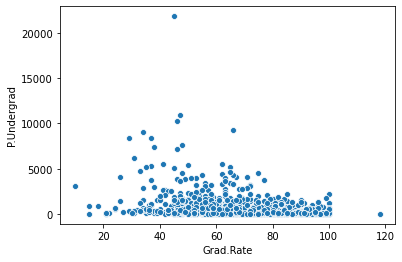

In [11]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'P.Undergrad', data = edu)

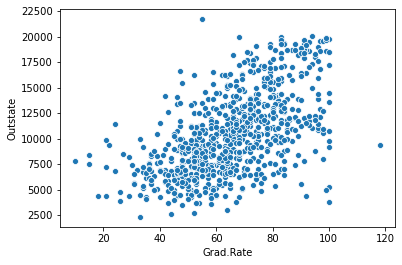

In [12]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Outstate', data = edu)

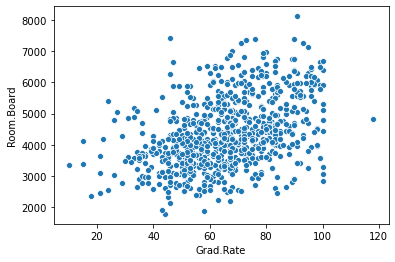

In [13]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Room.Board', data = edu)

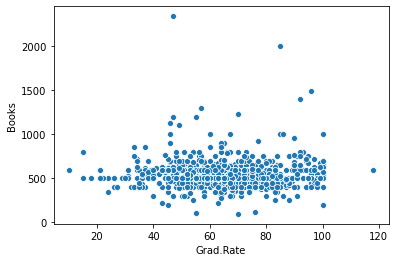

In [14]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Books', data = edu)

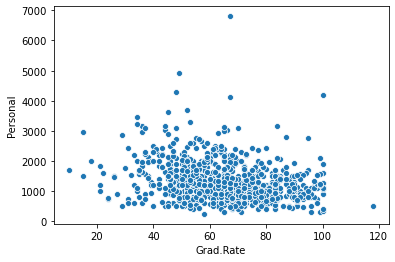

In [15]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Personal', data = edu)

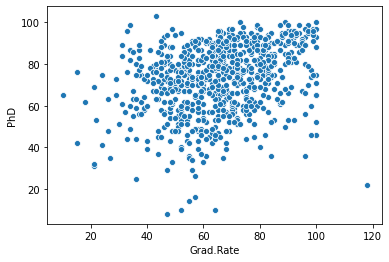

In [16]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'PhD', data = edu)

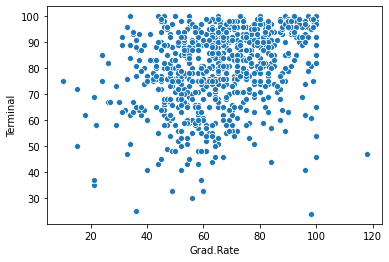

In [17]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Terminal', data = edu)

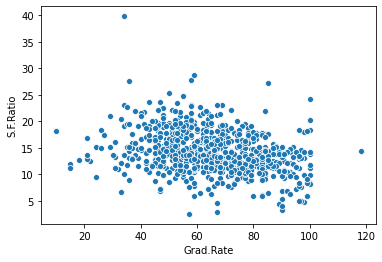

In [18]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'S.F.Ratio', data = edu)

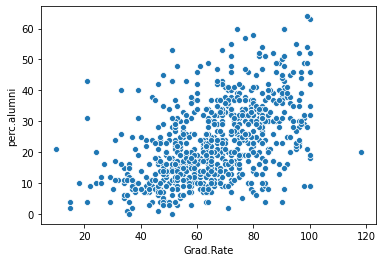

In [19]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'perc.alumni', data = edu)

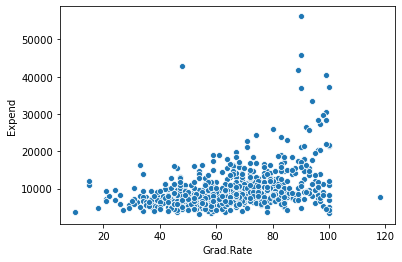

In [20]:
figure = plt.figure(figsize=(6,4))
ax = sns.scatterplot(x = 'Grad.Rate', y = 'Expend', data = edu)

In [26]:
edu.corr(method = 'pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

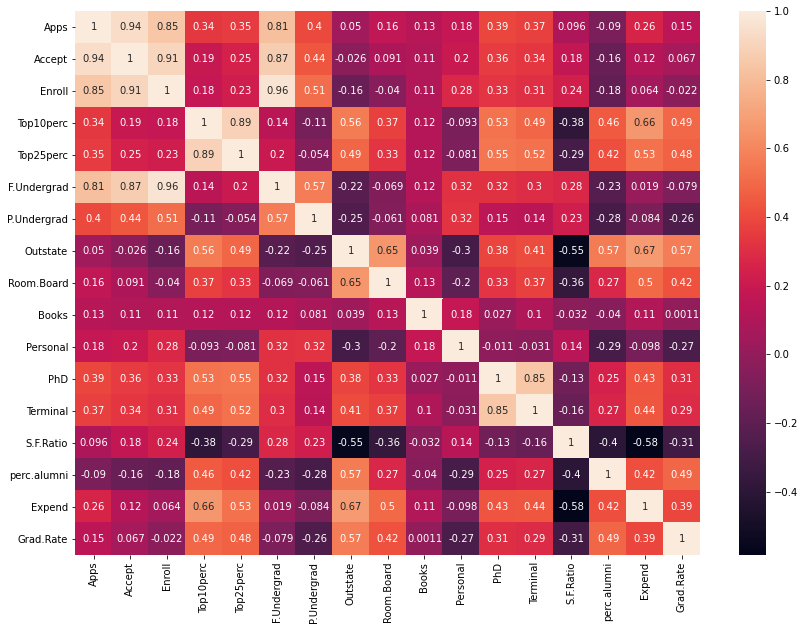

In [22]:
plt.subplots(figsize = (14,10))
sns.heatmap(edu.corr(), annot = True)

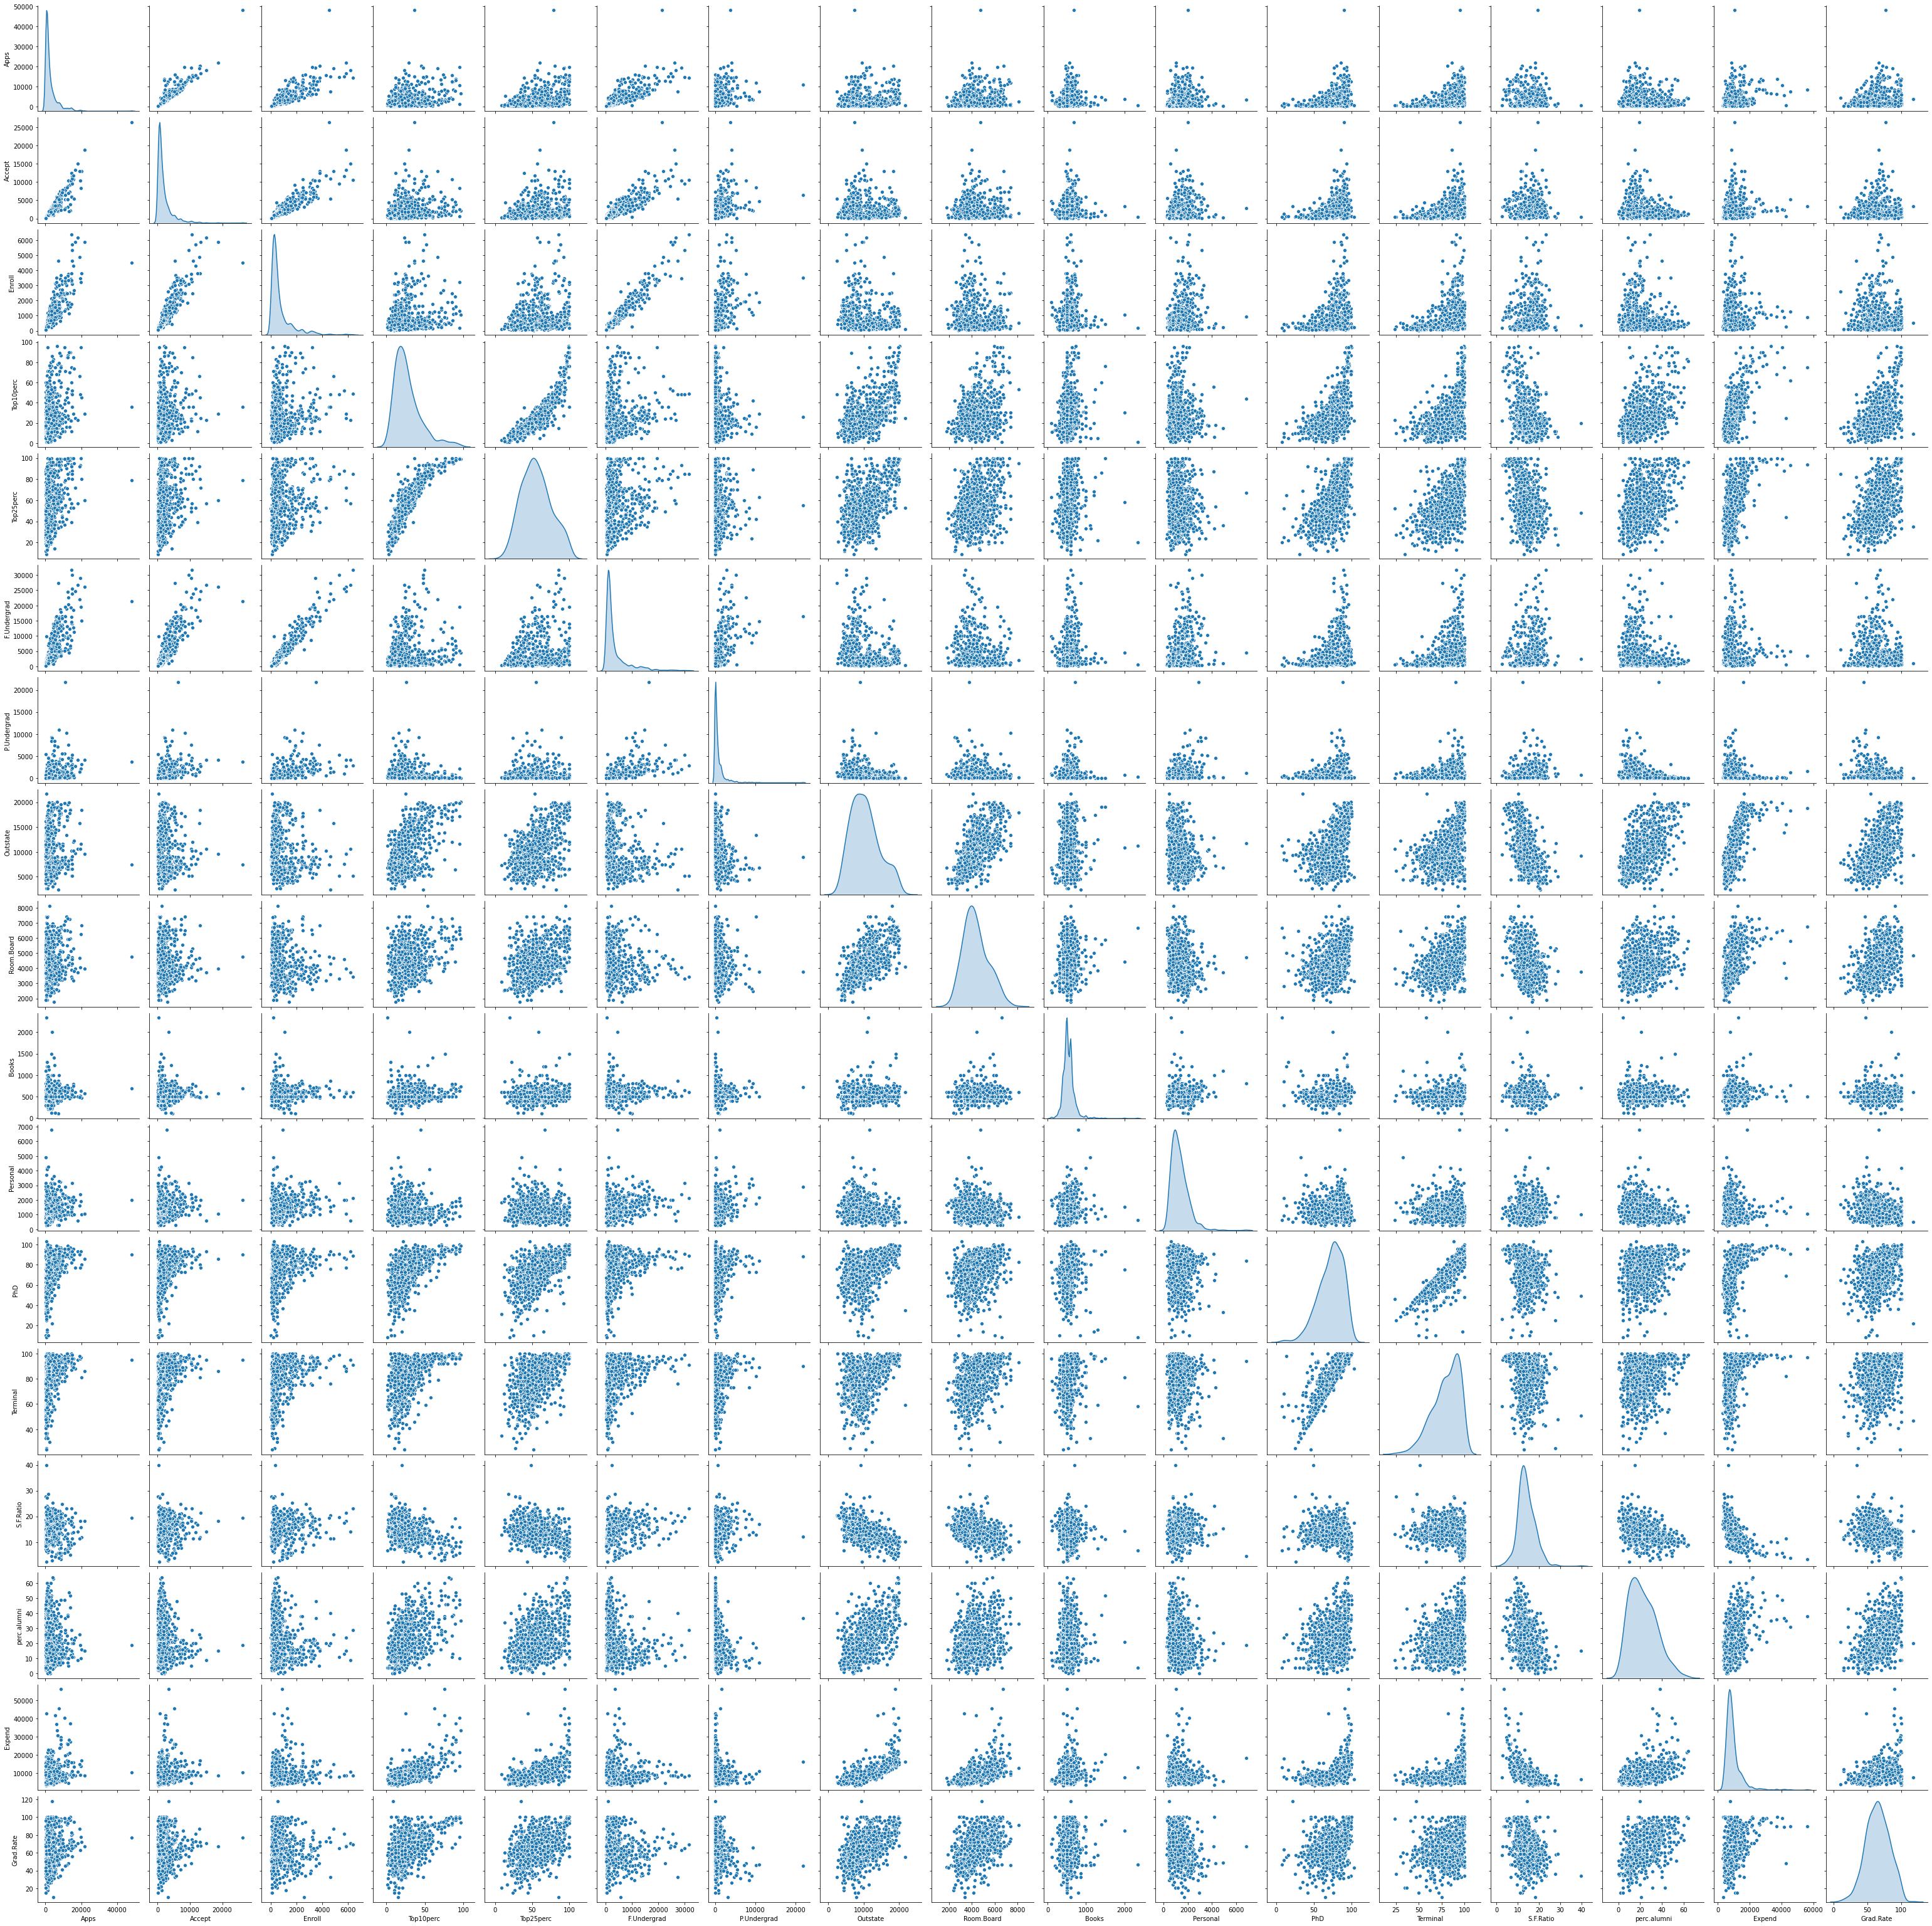

In [18]:
sns.pairplot(edu, diag_kind = 'kde', palette='coolwarm')

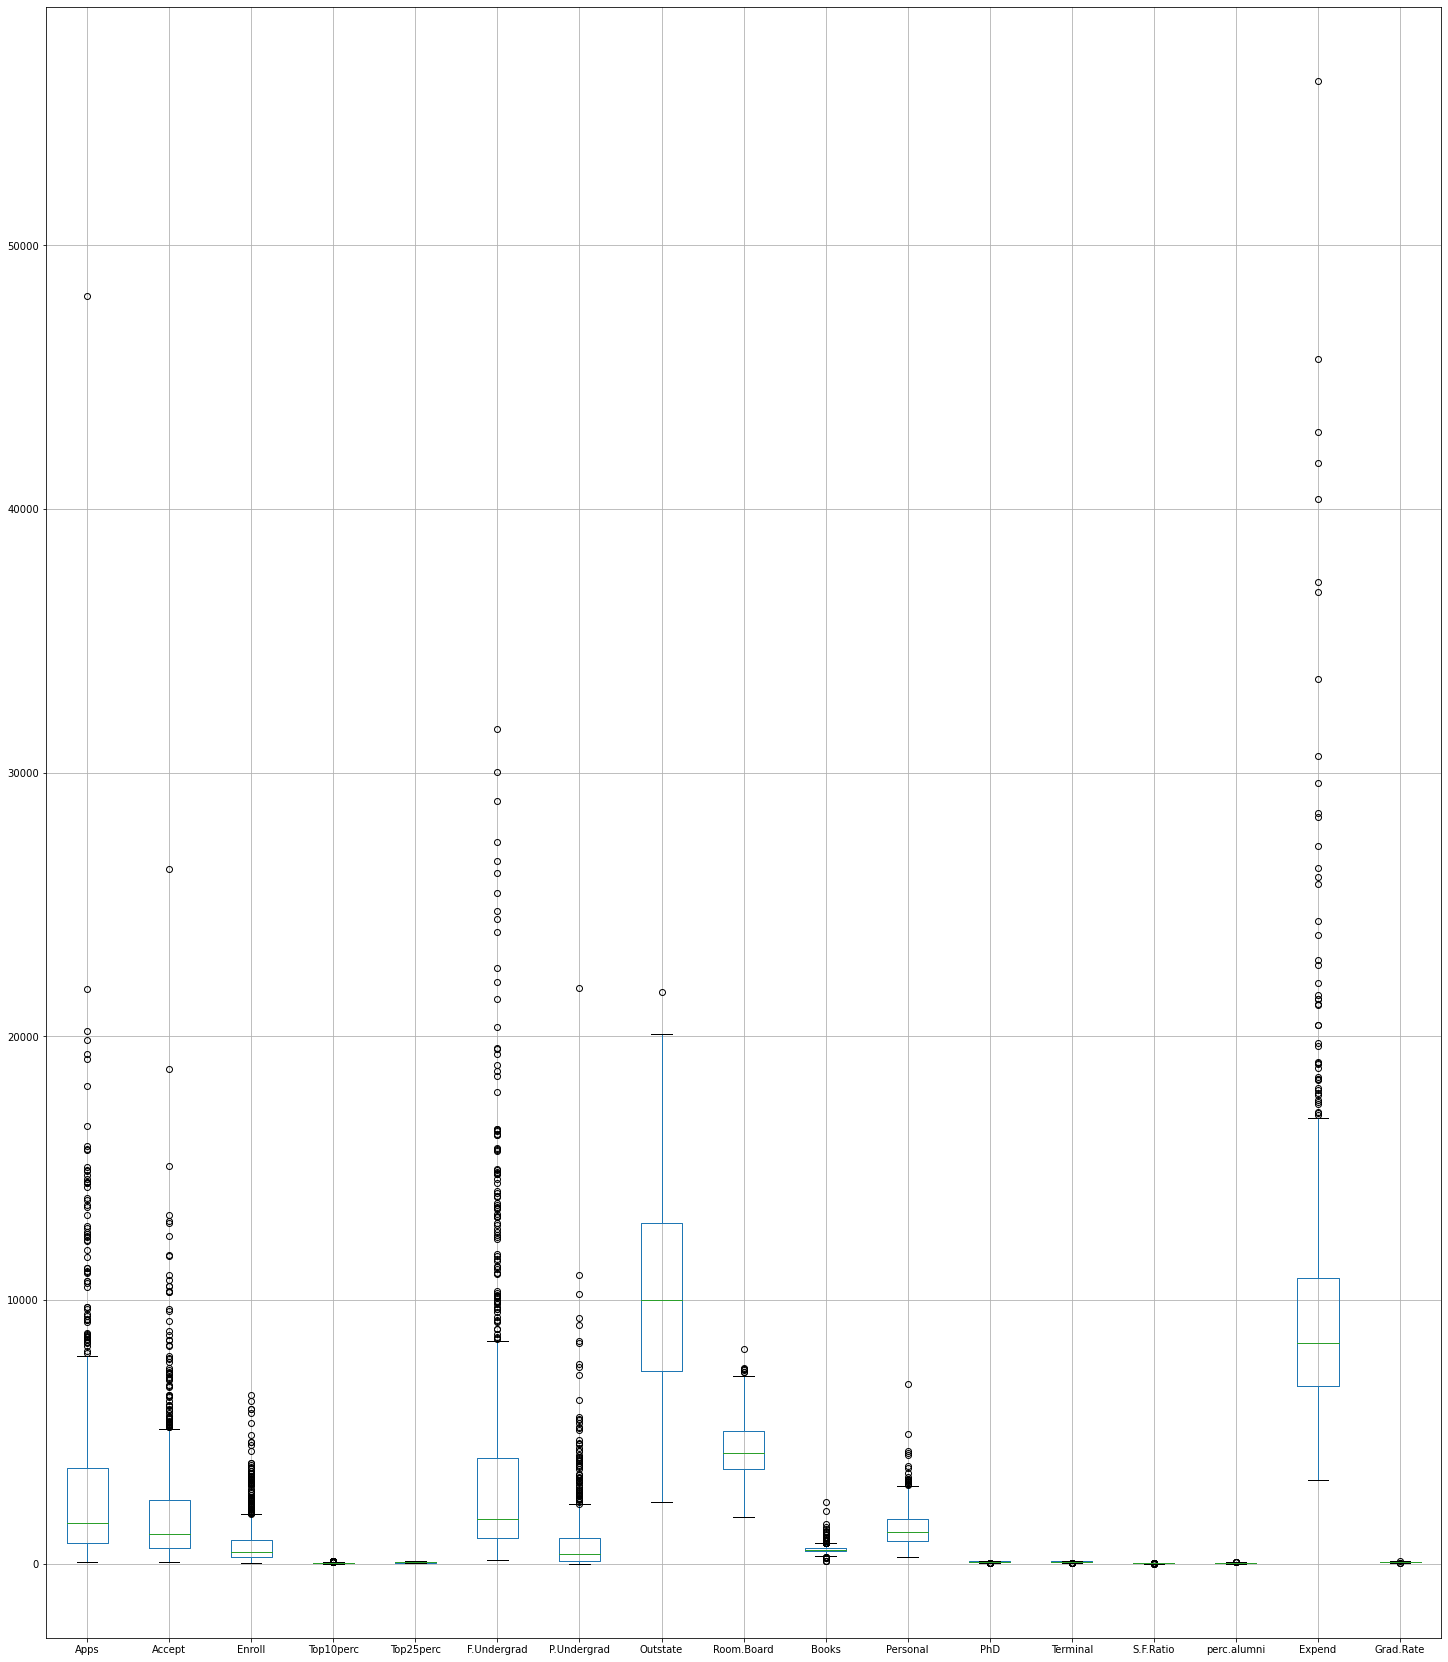

In [24]:
plt.subplots(figsize=(25,30))
edu.boxplot(figsize=(25,30))

In [21]:
#Treating Outliers:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [22]:
lrapps,urapps = remove_outlier(edu['Apps'])
edu['Apps'] = np.where(edu['Apps']>urapps,urapps,edu['Apps'])
edu['Apps'] = np.where(edu['Apps']<lrapps,lrapps,edu['Apps'])

lrccept,urccept = remove_outlier(edu['Accept'])
edu['Accept'] = np.where(edu['Accept']>urccept,urccept,edu['Accept'])
edu['Accept'] = np.where(edu['Accept']<lrccept,lrccept,edu['Accept'])

lrroll,urroll = remove_outlier(edu['Enroll'])
edu['Enroll'] = np.where(edu['Enroll']>urroll,urroll,edu['Enroll'])
edu['Enroll'] = np.where(edu['Enroll']<lrroll,lrroll,edu['Enroll'])

lr10perc,ur10perc = remove_outlier(edu['Top10perc'])
edu['Top10perc'] = np.where(edu['Top10perc']>ur10perc,ur10perc,edu['Top10perc'])
edu['Top10perc'] = np.where(edu['Top10perc']<lr10perc,lr10perc,edu['Top10perc'])

lr25perc,ur25perc = remove_outlier(edu['Top25perc'])
edu['Top25perc'] = np.where(edu['Top25perc']>ur25perc,ur25perc,edu['Top25perc'])
edu['Top25perc'] = np.where(edu['Top25perc']<lr25perc,lr25perc,edu['Top25perc'])

lrFgrad,urFgrad = remove_outlier(edu['F.Undergrad'])
edu['F.Undergrad'] = np.where(edu['F.Undergrad']>urFgrad,urFgrad,edu['F.Undergrad'])
edu['F.Undergrad'] = np.where(edu['F.Undergrad']<lrFgrad,lrFgrad,edu['F.Undergrad'])

lrPgrad,urPgrad = remove_outlier(edu['P.Undergrad'])
edu['P.Undergrad'] = np.where(edu['P.Undergrad']>urPgrad,urPgrad,edu['P.Undergrad'])
edu['P.Undergrad'] = np.where(edu['P.Undergrad']<lrPgrad,lrPgrad,edu['P.Undergrad'])

lrost,urost = remove_outlier(edu['Outstate'])
edu['Outstate'] = np.where(edu['Outstate']>urost,urost,edu['Outstate'])
edu['Outstate'] = np.where(edu['Outstate']<lrost,lrost,edu['Outstate'])

lrrb,urrb = remove_outlier(edu['Room.Board'])
edu['Room.Board'] = np.where(edu['Room.Board']>urrb,urrb,edu['Room.Board'])
edu['Room.Board'] = np.where(edu['Room.Board']<lrrb,lrrb,edu['Room.Board'])

lrbooks,urbooks = remove_outlier(edu['Books'])
edu['Books'] = np.where(edu['Books']>urbooks,urbooks,edu['Books'])
edu['Books'] = np.where(edu['Books']<lrbooks,lrbooks,edu['Books'])

lrpers,urpers = remove_outlier(edu['Personal'])
edu['Personal'] = np.where(edu['Personal']>urpers,urpers,edu['Personal'])
edu['Personal'] = np.where(edu['Personal']<lrpers,lrpers,edu['Personal'])

lrphd,urphd = remove_outlier(edu['PhD'])
edu['PhD'] = np.where(edu['PhD']>urphd,urphd,edu['PhD'])
edu['PhD'] = np.where(edu['PhD']<lrphd,lrphd,edu['PhD'])

lrter,urter = remove_outlier(edu['Terminal'])
edu['Terminal'] = np.where(edu['Terminal']>urter,urter,edu['Terminal'])
edu['Terminal'] = np.where(edu['Terminal']<lrter,lrter,edu['Terminal'])

lrsfr,ursfr= remove_outlier(edu['S.F.Ratio'])
edu['S.F.Ratio'] = np.where(edu['S.F.Ratio']>ursfr,ursfr,edu['S.F.Ratio'])
edu['S.F.Ratio'] = np.where(edu['S.F.Ratio']<lrsfr,lrsfr,edu['S.F.Ratio'])

lrpal,urpal = remove_outlier(edu['perc.alumni'])
edu['perc.alumni'] = np.where(edu['perc.alumni']>urpal,urpal,edu['perc.alumni'])
edu['perc.alumni'] = np.where(edu['perc.alumni']<lrpal,lrpal,edu['perc.alumni'])

lrexp,urexp = remove_outlier(edu['Expend'])
edu['Expend'] = np.where(edu['Expend']>urexp,urexp,edu['Expend'])
edu['Expend'] = np.where(edu['Expend']<lrexp,lrexp,edu['Expend'])

lrgr,urgr = remove_outlier(edu['Grad.Rate'])
edu['Grad.Rate'] = np.where(edu['Grad.Rate']>urgr,urgr,edu['Grad.Rate'])
edu['Grad.Rate'] = np.where(edu['Grad.Rate']<lrgr,lrgr,edu['Grad.Rate'])

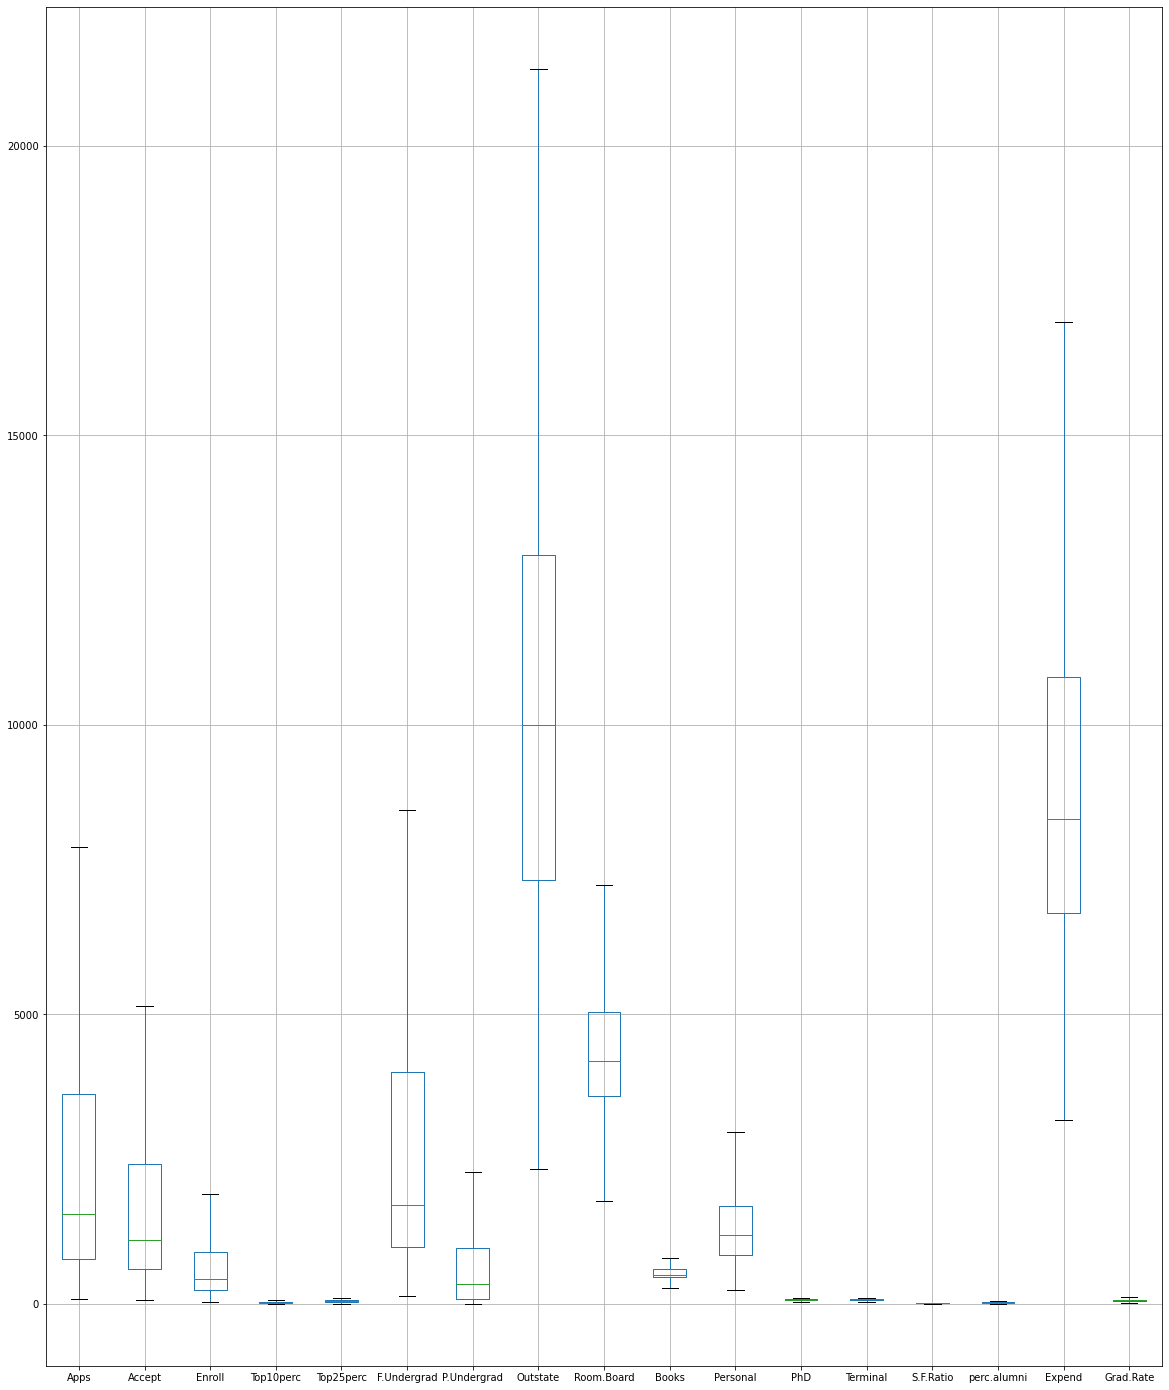

In [34]:
plt.subplots(figsize=(20,25))
edu.boxplot(figsize=(25,20))

In [19]:
#2.2)
#in this dataset, the names column is a categorical data but it is essential for the analysis.
# Using the One hot Encoding method:
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 
edu_dummies = pd.get_dummies(edu, prefix = 'Names', columns = ['Names'])

In [7]:
edu_dummies.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  ...  Names_Winthrop University  \
0      7440        3300    450  ...                          0   
1     12280        6450    750  ...                          0   
2     11250        3750    400  ...                          0   
3     12960        5450    450  ...                          0   
4      7560        4120    800  ...                          0   

   Names_Wisconsin Lutheran College  Names_Wittenberg University  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Names_Wofford College  Names_Worcester Polytechnic Institute  \
0                      0                                      0   
1                      0                                      0   
2                      0                                      0   
3                      0                                      0   
4                      0                                      0   

   Names_Worcester State College  Names_Xavier University  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   Names_Xavier University of Louisiana  Names_Yale University  \
0                                     0                      0   
1                                     0                      0   
2                                     0                      0   
3                                     0                      0   
4                                     0                      0   

   Names_York College of Pennsylvania  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 794 columns]

In [23]:
edu = edu.drop(['Names'], axis=1)
edu.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0       52.0       2885.0        537.0   
1  2186.0  1924.0   512.0       16.0       29.0       2683.0       1227.0   
2  1428.0  1097.0   336.0       22.0       50.0       1036.0         99.0   
3   417.0   349.0   137.0       60.0       89.0        510.0         63.0   
4   193.0   146.0    55.0       16.0       44.0        249.0        869.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0  450.0    2200.0  70.0      78.0       18.1   
1   12280.0      6450.0  750.0    1500.0  29.0      39.5       12.2   
2   11250.0      3750.0  400.0    1165.0  53.0      66.0       12.9   
3   12960.0      5450.0  450.0     875.0  92.0      97.0        7.7   
4    7560.0      4120.0  795.0    1500.0  76.0      72.0       11.9   

   perc.alumni   Expend  Grad.Rate  
0         12.0   7041.0       60.0  
1         16.0  10527.0       56.0  
2         30.0   8735.0       54.0  
3         37.0  16948.5       59.0  
4          2.0  10922.0       15.5

In [28]:
# Standard Scaler:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [14]:
edu['Apps_stdscale'] = std_scale.fit_transform(edu[['Apps']])
edu['Apps_stdscale'].head()

0   -0.346882
1   -0.210884
2   -0.406866
3   -0.668261
4   -0.726176
Name: Apps_stdscale, dtype: float64

In [15]:
edu['Apps_stdscale'].describe()

count    7.770000e+02
mean     6.355797e-17
std      1.000644e+00
min     -7.551337e-01
25%     -5.754408e-01
50%     -3.732540e-01
75%      1.609122e-01
max      1.165867e+01
Name: Apps_stdscale, dtype: float64

In [29]:
# Min-Max Scaler:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale

MinMaxScaler()

In [32]:
edu['Minmax_Accept'] = minmax_scale.fit_transform(edu[['Accept']])
edu['Minmax_Accept']

0      0.044177
1      0.070531
2      0.039036
3      0.010549
4      0.002818
         ...   
772    0.054955
773    0.065999
774    0.070188
775    0.090677
776    0.067903
Name: Minmax_Accept, Length: 777, dtype: float64

In [33]:
edu['Minmax_Apps'] = minmax_scale.fit_transform(edu[['Accept']])
edu['Minmax_Apps']

0      0.044177
1      0.070531
2      0.039036
3      0.010549
4      0.002818
         ...   
772    0.054955
773    0.065999
774    0.070188
775    0.090677
776    0.067903
Name: Minmax_Apps, Length: 777, dtype: float64

In [30]:
edu['Minmax_Enroll'] = minmax_scale.fit_transform(edu[['Enroll']])
edu['Minmax_Top10perc'] = minmax_scale.fit_transform(edu[['Top10perc']])
edu['Minmax_Top25perc'] = minmax_scale.fit_transform(edu[['Top25perc']])
edu['Minmax_F.Undergrad'] = minmax_scale.fit_transform(edu[['F.Undergrad']])
edu['Minmax_P.Undergrad'] = minmax_scale.fit_transform(edu[['P.Undergrad']])
edu['Minmax_Outstate'] = minmax_scale.fit_transform(edu[['Outstate']])
edu['Minmax_Room.Board'] = minmax_scale.fit_transform(edu[['Room.Board']])
edu['Minmax_Books'] = minmax_scale.fit_transform(edu[['Books']])
edu['Minmax_Personal'] = minmax_scale.fit_transform(edu[['Personal']])
edu['Minmax_PhD'] = minmax_scale.fit_transform(edu[['PhD']])
edu['Minmax_Terminal'] = minmax_scale.fit_transform(edu[['Terminal']])
edu['Minmax_S.F.Ratio'] = minmax_scale.fit_transform(edu[['S.F.Ratio']])
edu['Minmax_perc.alumni'] = minmax_scale.fit_transform(edu[['perc.alumni']])
edu['Minmax_Expend'] = minmax_scale.fit_transform(edu[['Expend']])
edu['Minmax_Grad.Rate'] = minmax_scale.fit_transform(edu[['Grad.Rate']])

In [34]:
edu1 = pd.DataFrame(edu, columns = ['Minmax_Apps','Minmax_Accept','Minmax_Enroll','Minmax_Top10perc','Minmax_Top25perc','Minmax_F.Undergrad','Minmax_P.Undergrad','Minmax_Outstate','Minmax_Room.Board','Minmax_Books','Minmax_Personal','Minmax_PhD','Minmax_Terminal','Minmax_S.F.Ratio','Minmax_perc.alumni','Minmax_Expend','Minmax_Grad.Rate'])
edu1.head()

Minmax_Apps  Minmax_Accept  Minmax_Enroll  Minmax_Top10perc  \
0     0.044177       0.044177       0.107913          0.231579   
1     0.070531       0.070531       0.075035          0.157895   
2     0.039036       0.039036       0.047349          0.221053   
3     0.010549       0.010549       0.016045          0.621053   
4     0.002818       0.002818       0.003146          0.157895   

   Minmax_Top25perc  Minmax_F.Undergrad  Minmax_P.Undergrad  Minmax_Outstate  \
0          0.472527            0.087164            0.024548         0.263430   
1          0.219780            0.080752            0.056148         0.513430   
2          0.450549            0.028473            0.004488         0.460227   
3          0.879121            0.011776            0.002839         0.548554   
4          0.384615            0.003492            0.039753         0.269628   

   Minmax_Room.Board  Minmax_Books  Minmax_Personal  Minmax_PhD  \
0           0.239596      0.157754         0.297710    0.652632   
1           0.736129      0.291444         0.190840    0.221053   
2           0.310530      0.135472         0.139695    0.473684   
3           0.578499      0.157754         0.095420    0.884211   
4           0.368852      0.313725         0.190840    0.715789   

   Minmax_Terminal  Minmax_S.F.Ratio  Minmax_perc.alumni  Minmax_Expend  \
0         0.710526          0.418231            0.187500       0.072671   
1         0.078947          0.260054            0.250000       0.138387   
2         0.552632          0.278820            0.468750       0.104605   
3         0.960526          0.139410            0.578125       0.298415   
4         0.631579          0.252011            0.031250       0.145833   

   Minmax_Grad.Rate  
0          0.462963  
1          0.425926  
2          0.407407  
3          0.453704  
4          0.046296

In [21]:
edu['Minmax_Accept'].min(), edu['Minmax_Accept'].max()

(0.0, 1.0)

In [35]:
#Scaling via Log Transformation:
import numpy as np

In [36]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)
log_transformer

FunctionTransformer(func=<ufunc 'log1p'>)

In [20]:
edu['Log_Outstate'] = log_transformer.fit_transform(edu[['Outstate']])
edu['Log_Outstate'].head()

0    8.914761
1    9.415809
2    9.328212
3    9.469700
4    8.930759
Name: Log_Outstate, dtype: float64

In [37]:
edu['Log_Apps'] = log_transformer.fit_transform(edu[['Apps']])
edu['Log_Accept'] = log_transformer.fit_transform(edu[['Accept']])
edu['Log_Enroll'] = log_transformer.fit_transform(edu[['Enroll']])
edu['Log_Top10perc'] = log_transformer.fit_transform(edu[['Top10perc']])
edu['Log_Top25perc'] = log_transformer.fit_transform(edu[['Top25perc']])
edu['Log_F.Undergrad'] = log_transformer.fit_transform(edu[['F.Undergrad']])
edu['Log_P.Undergrad'] = log_transformer.fit_transform(edu[['P.Undergrad']])
edu['Log_Outstate'] = log_transformer.fit_transform(edu[['Outstate']])
edu['Log_Room.Board'] = log_transformer.fit_transform(edu[['Room.Board']])
edu['Log_Books'] = log_transformer.fit_transform(edu[['Books']])
edu['Log_Personal'] = log_transformer.fit_transform(edu[['Personal']])
edu['Log_PhD'] = log_transformer.fit_transform(edu[['PhD']])
edu['Log_Terminal'] = log_transformer.fit_transform(edu[['Terminal']])
edu['Log_S.F.Ratio'] = log_transformer.fit_transform(edu[['S.F.Ratio']])
edu['Log_perc.alumni'] = log_transformer.fit_transform(edu[['perc.alumni']])
edu['Log_Expend'] = log_transformer.fit_transform(edu[['Expend']])
edu['Grad.Rate'] = log_transformer.fit_transform(edu[['Grad.Rate']])

In [38]:
edu2 = pd.DataFrame(edu, columns = ['Log_Apps','Log_Accept','Log_Enroll','Log_Top10perc','Log_Top25perc','Log_F.Undergrad','Log_P.Undergrad','Log_Outstate','Log_Room.Board','Log_Books','Log_Personal','Log_PhD','Log_Terminal','Log_S.F.Ratio','Log_perc.alumni','Log_Expend','Grad.Rate'])
edu2.head()

Log_Apps  Log_Accept  Log_Enroll  Log_Top10perc  Log_Top25perc  \
0  7.415175    7.117206    6.582025       3.178054       3.970292   
1  7.690286    7.562681    6.240276       2.833213       3.401197   
2  7.264730    7.001246    5.820083       3.135494       3.931826   
3  6.035481    5.857933    4.927254       4.110874       4.499810   
4  5.267858    4.990433    4.025352       2.833213       3.806662   

   Log_F.Undergrad  Log_P.Undergrad  Log_Outstate  Log_Room.Board  Log_Books  \
0         7.967627         6.287859      8.914761        8.101981   6.111467   
1         7.895063         7.113142      9.415809        8.771990   6.621406   
2         6.944087         4.605170      9.328212        8.229778   5.993961   
3         6.236370         4.158883      9.469700        8.603554   6.111467   
4         5.521461         6.768493      8.930759        8.323851   6.685861   

   Log_Personal   Log_PhD  Log_Terminal  Log_S.F.Ratio  Log_perc.alumni  \
0      7.696667  4.262680      4.369448       2.949688         2.564949   
1      7.313887  3.401197      3.433987       2.580217         2.833213   
2      7.061334  3.988984      4.204693       2.631889         3.433987   
3      6.775366  4.532599      4.584967       2.163323         3.637586   
4      7.313887  4.343805      4.290459       2.557227         1.098612   

   Log_Expend  Grad.Rate  
0    8.859647   4.110874  
1    9.261794   4.043051  
2    9.075208   4.007333  
3    9.853089   4.094345  
4    9.298626   2.772589

In [8]:
# we will use the Standard Scaler:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [9]:
edu['std_Apps'] = std_scale.fit_transform(edu[['Apps']])
edu['std_Accept'] = std_scale.fit_transform(edu[['Accept']])
edu['std_Enroll'] = std_scale.fit_transform(edu[['Enroll']])
edu['std_Top10perc'] = std_scale.fit_transform(edu[['Top10perc']])
edu['std_Top25perc'] = std_scale.fit_transform(edu[['Top25perc']])
edu['std_F.Undergrad'] = std_scale.fit_transform(edu[['F.Undergrad']])
edu['std_P.Undergrad'] = std_scale.fit_transform(edu[['P.Undergrad']])
edu['std_Outstate'] = std_scale.fit_transform(edu[['Outstate']])
edu['std_Room.Board'] = std_scale.fit_transform(edu[['Room.Board']])
edu['std_Books'] = std_scale.fit_transform(edu[['Books']])
edu['std_Personal'] = std_scale.fit_transform(edu[['Personal']])
edu['std_PhD'] = std_scale.fit_transform(edu[['PhD']])
edu['std_Terminal'] = std_scale.fit_transform(edu[['Terminal']])
edu['std_S.F.Ratio'] = std_scale.fit_transform(edu[['S.F.Ratio']])
edu['std_perc.alumni'] = std_scale.fit_transform(edu[['perc.alumni']])
edu['std_Expend'] = std_scale.fit_transform(edu[['Expend']])
edu['std_Grad.Rate'] = std_scale.fit_transform(edu[['Grad.Rate']])

In [41]:
edu3 = pd.DataFrame(edu, columns = ['std_Apps','std_Accept','std_Enroll','std_Top10perc','std_Top25perc','std_F.Undergrad','std_P.Undergrad','std_Outstate','std_Room.Board','std_Books','std_Personal','std_PhD','std_Terminal','std_S.F.Ratio','std_perc.alumni','std_Expend','std_Grad.Rate'])
edu3.head()

std_Apps  std_Accept  std_Enroll  std_Top10perc  std_Top25perc  \
0 -0.346882   -0.321205   -0.063509      -0.258583      -0.191827   
1 -0.210884   -0.038703   -0.288584      -0.655656      -1.353911   
2 -0.406866   -0.376318   -0.478121      -0.315307      -0.292878   
3 -0.668261   -0.681682   -0.692427       1.840231       1.677612   
4 -0.726176   -0.764555   -0.780735      -0.655656      -0.596031   

   std_F.Undergrad  std_P.Undergrad  std_Outstate  std_Room.Board  std_Books  \
0        -0.168116        -0.209207     -0.746356       -0.964905  -0.602312   
1        -0.209788         0.244307      0.457496        1.909208   1.215880   
2        -0.549565        -0.497090      0.201305       -0.554317  -0.905344   
3        -0.658079        -0.520752      0.626633        0.996791  -0.602312   
4        -0.711924         0.009005     -0.716508       -0.216723   1.518912   

   std_Personal   std_PhD  std_Terminal  std_S.F.Ratio  std_perc.alumni  \
0      1.270045 -0.163028     -0.115729       1.013776        -0.867574   
1      0.235515 -2.675646     -3.378176      -0.477704        -0.544572   
2     -0.259582 -1.204845     -0.931341      -0.300749         0.585935   
3     -0.688173  1.185206      1.175657      -1.615274         1.151188   
4      0.235515  0.204672     -0.523535      -0.553542        -1.675079   

   std_Expend  std_Grad.Rate  
0   -0.501910      -0.160741  
1    0.166110      -0.392057  
2   -0.177290      -0.513877  
3    1.792851      -0.217116  
4    0.241803      -4.725101

In [42]:
edu3['std_Apps'].min(),edu3['std_Apps'].max()

(-0.7551337089614527, 11.658671216805628)

In [43]:
# Answers for Questions: 2.3.) & 2.4.) combined
# i.) Covariance Matrix of the scaled data before outlier treatment:
cov_matrix = np.cov(edu3.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.13837894]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.07534778]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02101126]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.45665445]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [44]:
# ii.) Correlation Matrix of the scaled data before outlier treatment:
edu3.corr()

std_Apps  std_Accept  std_Enroll  std_Top10perc  \
std_Apps         1.000000    0.943451    0.846822       0.338834   
std_Accept       0.943451    1.000000    0.911637       0.192447   
std_Enroll       0.846822    0.911637    1.000000       0.181294   
std_Top10perc    0.338834    0.192447    0.181294       1.000000   
std_Top25perc    0.351640    0.247476    0.226745       0.891995   
std_F.Undergrad  0.814491    0.874223    0.964640       0.141289   
std_P.Undergrad  0.398264    0.441271    0.513069      -0.105356   
std_Outstate     0.050159   -0.025755   -0.155477       0.562331   
std_Room.Board   0.164939    0.090899   -0.040232       0.371480   
std_Books        0.132559    0.113525    0.112711       0.118858   
std_Personal     0.178731    0.200989    0.280929      -0.093316   
std_PhD          0.390697    0.355758    0.331469       0.531828   
std_Terminal     0.369491    0.337583    0.308274       0.491135   
std_S.F.Ratio    0.095633    0.176229    0.237271      -0.384875   
std_perc.alumni -0.090226   -0.159990   -0.180794       0.455485   
std_Expend       0.259592    0.124717    0.064169       0.660913   
std_Grad.Rate    0.138201    0.075251   -0.020984       0.456067   

                 std_Top25perc  std_F.Undergrad  std_P.Undergrad  \
std_Apps              0.351640         0.814491         0.398264   
std_Accept            0.247476         0.874223         0.441271   
std_Enroll            0.226745         0.964640         0.513069   
std_Top10perc         0.891995         0.141289        -0.105356   
std_Top25perc         1.000000         0.199445        -0.053577   
std_F.Undergrad       0.199445         1.000000         0.570512   
std_P.Undergrad      -0.053577         0.570512         1.000000   
std_Outstate          0.489394        -0.215742        -0.253512   
std_Room.Board        0.331490        -0.068890        -0.061326   
std_Books             0.115527         0.115550         0.081200   
std_Personal         -0.080810         0.317200         0.319882   
std_PhD               0.545862         0.318337         0.149114   
std_Terminal          0.524749         0.300019         0.141904   
std_S.F.Ratio        -0.294629         0.279703         0.232531   
std_perc.alumni       0.417864        -0.229462        -0.280792   
std_Expend            0.527447         0.018652        -0.083568   
std_Grad.Rate         0.448566        -0.063006        -0.250641   

                 std_Outstate  std_Room.Board  std_Books  std_Personal  \
std_Apps             0.050159        0.164939   0.132559      0.178731   
std_Accept          -0.025755        0.090899   0.113525      0.200989   
std_Enroll          -0.155477       -0.040232   0.112711      0.280929   
std_Top10perc        0.562331        0.371480   0.118858     -0.093316   
std_Top25perc        0.489394        0.331490   0.115527     -0.080810   
std_F.Undergrad     -0.215742       -0.068890   0.115550      0.317200   
std_P.Undergrad     -0.253512       -0.061326   0.081200      0.319882   
std_Outstate         1.000000        0.654256   0.038855     -0.299087   
std_Room.Board       0.654256        1.000000   0.127963     -0.199428   
std_Books            0.038855        0.127963   1.000000      0.179295   
std_Personal        -0.299087       -0.199428   0.179295      1.000000   
std_PhD              0.382982        0.329202   0.026906     -0.010936   
std_Terminal         0.407983        0.374540   0.099955     -0.030613   
std_S.F.Ratio       -0.554821       -0.362628  -0.031929      0.136345   
std_perc.alumni      0.566262        0.272363  -0.040208     -0.285968   
std_Expend           0.672779        0.501739   0.112409     -0.097892   
std_Grad.Rate        0.534914        0.399775  -0.006287     -0.259161   

                  std_PhD  std_Terminal  std_S.F.Ratio  std_perc.alumni  \
std_Apps         0.390697      0.369491       0.095633        -0.090226   
std_Accept       0.355758      0.337583       0.176229        -0.159990   
std_Enrol

In [45]:
# iii.) Covariance matrix of the unscaled data before outlier treatment:
cov_matrix2 = np.cov(edu.T)
print('Covariance Matrix \n%s', cov_matrix2)

Covariance Matrix 
%s [[ 1.49784595e+07  8.94985981e+06  3.04525599e+06 ... -3.49417281e+02
   1.00532039e+03  5.35209630e+02]
 [ 8.94985981e+06  6.00795970e+06  2.07626776e+06 ... -3.92405990e+02
   3.05892516e+02  1.84567120e+02]
 [ 3.04525599e+06  2.07626776e+06  8.63368392e+05 ... -1.68097807e+02
   5.96629244e+01 -1.95105972e+01]
 ...
 [-3.49417281e+02 -3.92405990e+02 -1.68097807e+02 ...  1.00128866e+00
   4.18250007e-01  4.59151202e-01]
 [ 1.00532039e+03  3.05892516e+02  5.96629244e+01 ...  4.18250007e-01
   1.00128866e+00  3.47288491e-01]
 [ 5.35209630e+02  1.84567120e+02 -1.95105972e+01 ...  4.59151202e-01
   3.47288491e-01  1.00128866e+00]]


In [46]:
# iv.) Correlation matrix of the unscaled data before the outlier treatment:
edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  \
Apps             1.000000  0.943451  0.846822   0.338834   0.351640   
Accept           0.943451  1.000000  0.911637   0.192447   0.247476   
Enroll           0.846822  0.911637  1.000000   0.181294   0.226745   
Top10perc        0.338834  0.192447  0.181294   1.000000   0.891995   
Top25perc        0.351640  0.247476  0.226745   0.891995   1.000000   
...                   ...       ...       ...        ...        ...   
std_Terminal     0.369491  0.337583  0.308274   0.491135   0.524749   
std_S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629   
std_perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864   
std_Expend       0.259592  0.124717  0.064169   0.660913   0.527447   
std_Grad.Rate    0.138201  0.075251 -0.020984   0.456067   0.448566   

                 F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
Apps                0.814491     0.398264  0.050159    0.164939  0.132559   
Accept              0.874223     0.441271 -0.025755    0.090899  0.113525   
Enroll              0.964640     0.513069 -0.155477   -0.040232  0.112711   
Top10perc           0.141289    -0.105356  0.562331    0.371480  0.118858   
Top25perc           0.199445    -0.053577  0.489394    0.331490  0.115527   
...                      ...          ...       ...         ...       ...   
std_Terminal        0.300019     0.141904  0.407983    0.374540  0.099955   
std_S.F.Ratio       0.279703     0.232531 -0.554821   -0.362628 -0.031929   
std_perc.alumni    -0.229462    -0.280792  0.566262    0.272363 -0.040208   
std_Expend          0.018652    -0.083568  0.672779    0.501739  0.112409   
std_Grad.Rate      -0.063006    -0.250641  0.534914    0.399775 -0.006287   

                 ...  std_Outstate  std_Room.Board  std_Books  std_Personal  \
Apps             ...      0.050159        0.164939   0.132559      0.178731   
Accept           ...     -0.025755        0.090899   0.113525      0.200989   
Enroll           ...     -0.155477       -0.040232   0.112711      0.280929   
Top10perc        ...      0.562331        0.371480   0.118858     -0.093316   
Top25perc        ...      0.489394        0.331490   0.115527     -0.080810   
...              ...           ...             ...        ...           ...   
std_Terminal     ...      0.407983        0.374540   0.099955     -0.030613   
std_S.F.Ratio    ...     -0.554821       -0.362628  -0.031929      0.136345   
std_perc.alumni  ...      0.566262        0.272363  -0.040208     -0.285968   
std_Expend       ...      0.672779        0.501739   0.112409     -0.097892   
std_Grad.Rate    ...      0.534914        0.399775  -0.006287     -0.259161   

                  std_PhD  std_Terminal  std_S.F.Ratio  std_perc.alumni  \
Apps             0.390697      0.369491       0.095633        -0.090226   
Accept           0.355758      0.337583       0.176229        -0.159990   
Enroll           0.331469      0.308274       0.237271        -0.180794   
Top10perc        0.531828      0.491135      -0.384875         0.455485   
Top25perc        0.545862      0.524749      -0.294629         0.417864   
...                   ...           ...            ...              ...   
std_Terminal     0.849587      1.000000      -0.160104         0.267130   
std_S.F.Ratio   -0.130530     -0.160104       1.000000        -0.402929   
std_perc.alumni  0.249009      0.267130      -0.402929         1.000000   
std_Expend       0.432762      0.438799      -0.583832         0.417712   
std_Grad.Rate    0.295097      0.286501      -0.276071         0.458560   

                 std_Expend  std_Grad.Rate  
Apps               0.259592       0.138201  
Accept             0.124717       0.075251  
Enroll             0.064169      -0.020984  
Top10perc          0.660913       0.456067  
Top25perc          0.527447       0.448566  
...                     ...            ...  
std_Terminal       0.438799       0.286501  
std_S.F.Ratio     -0.583832      

In [49]:
# 2.4)
# Covariance matrix of the unscaled data after the Outlier Treatment:
cov_matrix3 = np.cov(edu.T)
print('Covariance Matrix \n%s', cov_matrix3)

Covariance Matrix 
%s [[ 5.86702997e+06  3.52479270e+06  1.23855861e+06 ... -2.42141064e+02
   7.13418382e+02  3.31510388e+02]
 [ 3.52479270e+06  2.32040216e+06  8.12257024e+05 ... -2.51850930e+02
   2.63089419e+02  1.19447762e+02]
 [ 1.23855861e+06  8.12257024e+05  3.25044609e+05 ... -1.26748066e+02
   5.38242621e+01 -1.68906294e+01]
 ...
 [-2.42141064e+02 -2.51850930e+02 -1.26748066e+02 ...  1.00128866e+00
   4.18250007e-01  4.59151202e-01]
 [ 7.13418382e+02  2.63089419e+02  5.38242621e+01 ...  4.18250007e-01
   1.00128866e+00  3.47288491e-01]
 [ 3.31510388e+02  1.19447762e+02 -1.68906294e+01 ...  4.59151202e-01
   3.47288491e-01  1.00128866e+00]]


In [50]:
# Correlation matrix of the unscaled data after the Outlier treatment:
edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  \
Apps             1.000000  0.955307  0.896883   0.321342   0.364491   
Accept           0.955307  1.000000  0.935277   0.223298   0.273681   
Enroll           0.896883  0.935277  1.000000   0.171756   0.230434   
Top10perc        0.321342  0.223298  0.171756   1.000000   0.913875   
Top25perc        0.364491  0.273681  0.230434   0.913875   1.000000   
...                   ...       ...       ...        ...        ...   
std_Terminal     0.430973  0.400309  0.352047   0.502348   0.524749   
std_S.F.Ratio    0.113822  0.173067  0.258800  -0.380356  -0.294629   
std_perc.alumni -0.099903 -0.165227 -0.222172   0.457219   0.417864   
std_Expend       0.294344  0.172601  0.094347   0.618974   0.527447   
std_Grad.Rate    0.136776  0.078364 -0.029607   0.461028   0.448566   

                 F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
Apps                0.861002     0.519823  0.065337    0.187475  0.236138   
Accept              0.897034     0.572691 -0.005002    0.119586  0.208705   
Enroll              0.967302     0.641595 -0.155655   -0.023846  0.202057   
Top10perc           0.111215    -0.180009  0.562160    0.357366  0.153452   
Top25perc           0.181196    -0.099295  0.489569    0.330987  0.169761   
...                      ...          ...       ...         ...       ...   
std_Terminal        0.332853     0.121260  0.408281    0.375234  0.155217   
std_S.F.Ratio       0.308648     0.358651 -0.554882   -0.362930 -0.000991   
std_perc.alumni    -0.284742    -0.418667  0.566349    0.272246 -0.042576   
std_Expend          0.038815    -0.162679  0.672846    0.503442  0.124483   
std_Grad.Rate      -0.073075    -0.250670  0.535141    0.400400 -0.016103   

                 ...  std_Outstate  std_Room.Board  std_Books  std_Personal  \
Apps             ...      0.065216        0.186716   0.158103      0.205577   
Accept           ...     -0.005110        0.119010   0.136139      0.233011   
Enroll           ...     -0.155718       -0.023685   0.123868      0.309071   
Top10perc        ...      0.561963        0.357546   0.111519     -0.103247   
Top25perc        ...      0.489394        0.331490   0.115527     -0.080810   
...              ...           ...             ...        ...           ...   
std_Terminal     ...      0.407983        0.374540   0.099955     -0.030613   
std_S.F.Ratio    ...     -0.554821       -0.362628  -0.031929      0.136345   
std_perc.alumni  ...      0.566262        0.272363  -0.040208     -0.285968   
std_Expend       ...      0.672779        0.501739   0.112409     -0.097892   
std_Grad.Rate    ...      0.534914        0.399775  -0.006287     -0.259161   

                  std_PhD  std_Terminal  std_S.F.Ratio  std_perc.alumni  \
Apps             0.457815      0.430973       0.113822        -0.099903   
Accept           0.421975      0.400309       0.173067        -0.165227   
Enroll           0.377460      0.352047       0.258800        -0.222172   
Top10perc        0.539932      0.502348      -0.380356         0.457219   
Top25perc        0.545862      0.524749      -0.294629         0.417864   
...                   ...           ...            ...              ...   
std_Terminal     0.849587      1.000000      -0.160104         0.267130   
std_S.F.Ratio   -0.130530     -0.160104       1.000000        -0.402929   
std_perc.alumni  0.249009      0.267130      -0.402929         1.000000   
std_Expend       0.432762      0.438799      -0.583832         0.417712   
std_Grad.Rate    0.295097      0.286501      -0.276071         0.458560   

                 std_Expend  std_Grad.Rate  
Apps               0.294344       0.136776  
Accept             0.172601       0.078364  
Enroll             0.094347      -0.029607  
Top10perc          0.618974       0.461028  
Top25perc          0.527447       0.448566  
...                     ...            ...  
std_Terminal       0.438799       0.286501  
std_S.F.Ratio     -0.583832      

In [10]:
# Scaling of the data after outlier treatment:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [11]:
edu['std_Apps'] = std_scale.fit_transform(edu[['Apps']])
edu['std_Accept'] = std_scale.fit_transform(edu[['Accept']])
edu['std_Enroll'] = std_scale.fit_transform(edu[['Enroll']])
edu['std_Top10perc'] = std_scale.fit_transform(edu[['Top10perc']])
edu['std_Top25perc'] = std_scale.fit_transform(edu[['Top25perc']])
edu['std_F.Undergrad'] = std_scale.fit_transform(edu[['F.Undergrad']])
edu['std_P.Undergrad'] = std_scale.fit_transform(edu[['P.Undergrad']])
edu['std_Outstate'] = std_scale.fit_transform(edu[['Outstate']])
edu['std_Room.Board'] = std_scale.fit_transform(edu[['Room.Board']])
edu['std_Books'] = std_scale.fit_transform(edu[['Books']])
edu['std_Personal'] = std_scale.fit_transform(edu[['Personal']])
edu['std_PhD'] = std_scale.fit_transform(edu[['PhD']])
edu['std_Terminal'] = std_scale.fit_transform(edu[['Terminal']])
edu['std_S.F.Ratio'] = std_scale.fit_transform(edu[['S.F.Ratio']])
edu['std_perc.alumni'] = std_scale.fit_transform(edu[['perc.alumni']])
edu['std_Expend'] = std_scale.fit_transform(edu[['Expend']])
edu['std_Grad.Rate'] = std_scale.fit_transform(edu[['Grad.Rate']])

In [12]:
edu4 = pd.DataFrame(edu, columns = ['std_Apps','std_Accept','std_Enroll','std_Top10perc','std_Top25perc','std_F.Undergrad','std_P.Undergrad','std_Outstate','std_Room.Board','std_Books','std_Personal','std_PhD','std_Terminal','std_S.F.Ratio','std_perc.alumni','std_Expend','std_Grad.Rate'])
edu4.head()

std_Apps  std_Accept  std_Enroll  std_Top10perc  std_Top25perc  \
0 -0.376493   -0.337830    0.106380      -0.246780      -0.191827   
1 -0.159195    0.116744   -0.260441      -0.696290      -1.353911   
2 -0.472336   -0.426511   -0.569343      -0.310996      -0.292878   
3 -0.889994   -0.917871   -0.918613       2.129202       1.677612   
4 -0.982532   -1.051221   -1.062533      -0.696290      -0.596031   

   std_F.Undergrad  std_P.Undergrad  std_Outstate  std_Room.Board  std_Books  \
0        -0.018769        -0.166083     -0.746480       -0.968324  -0.776567   
1        -0.093626         0.797856      0.457762        1.921680   1.828605   
2        -0.703966        -0.777974      0.201488       -0.555466  -1.210762   
3        -0.898889        -0.828267      0.626954        1.004218  -0.776567   
4        -0.995610         0.297726     -0.716623       -0.216006   2.219381   

   std_Personal   std_PhD  std_Terminal  std_S.F.Ratio  std_perc.alumni  \
0      1.438500 -0.174045     -0.123239       1.070602        -0.870466   
1      0.289289 -2.745731     -2.785068      -0.489511        -0.545726   
2     -0.260691 -1.240354     -0.952900      -0.304413         0.590864   
3     -0.736792  1.205884      1.190391      -1.679429         1.159159   
4      0.289289  0.202299     -0.538069      -0.568839        -1.682316   

   std_Expend  std_Grad.Rate  
0   -0.630916      -0.319205  
1    0.396097      -0.552693  
2   -0.131845      -0.669437  
3    2.287940      -0.377577  
4    0.512468      -2.916759

In [24]:
from scipy.stats import zscore
edu_new = edu.apply(zscore)
edu_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

In [13]:
# Covariance matrix of the scaled data after the Outlier Treatment:
cov_matrix4 = np.cov(edu4.T)
print('Covariance matrix \n%s', cov_matrix4)

Covariance matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [14]:
# Correlation matrix of the scaled data after the outlier treatment:
edu4.corr()

std_Apps  std_Accept  std_Enroll  std_Top10perc  \
std_Apps         1.000000    0.955307    0.896883       0.321342   
std_Accept       0.955307    1.000000    0.935277       0.223298   
std_Enroll       0.896883    0.935277    1.000000       0.171756   
std_Top10perc    0.321342    0.223298    0.171756       1.000000   
std_Top25perc    0.364491    0.273681    0.230434       0.913875   
std_F.Undergrad  0.861002    0.897034    0.967302       0.111215   
std_P.Undergrad  0.519823    0.572691    0.641595      -0.180009   
std_Outstate     0.065337   -0.005002   -0.155655       0.562160   
std_Room.Board   0.187475    0.119586   -0.023846       0.357366   
std_Books        0.236138    0.208705    0.202057       0.153452   
std_Personal     0.229948    0.256346    0.339348      -0.116730   
std_PhD          0.463924    0.427341    0.381540       0.544048   
std_Terminal     0.434478    0.403409    0.354379       0.506748   
std_S.F.Ratio    0.126411    0.188506    0.274269      -0.387926   
std_perc.alumni -0.101158   -0.165516   -0.222723       0.455797   
std_Expend       0.242935    0.161808    0.054221       0.657039   
std_Grad.Rate    0.150803    0.078982   -0.023251       0.493670   

                 std_Top25perc  std_F.Undergrad  std_P.Undergrad  \
std_Apps              0.364491         0.861002         0.519823   
std_Accept            0.273681         0.897034         0.572691   
std_Enroll            0.230434         0.967302         0.641595   
std_Top10perc         0.913875         0.111215        -0.180009   
std_Top25perc         1.000000         0.181196        -0.099295   
std_F.Undergrad       0.181196         1.000000         0.696130   
std_P.Undergrad      -0.099295         0.696130         1.000000   
std_Outstate          0.489569        -0.226166        -0.354216   
std_Room.Board        0.330987        -0.054476        -0.067638   
std_Books             0.169761         0.207879         0.122529   
std_Personal         -0.086810         0.359783         0.344053   
std_PhD               0.551461         0.361564         0.127663   
std_Terminal          0.527654         0.335054         0.122152   
std_S.F.Ratio        -0.297233         0.324504         0.370607   
std_perc.alumni       0.416832        -0.285457        -0.419334   
std_Expend            0.572905         0.000371        -0.201929   
std_Grad.Rate         0.478985        -0.082239        -0.265158   

                 std_Outstate  std_Room.Board  std_Books  std_Personal  \
std_Apps             0.065337        0.187475   0.236138      0.229948   
std_Accept          -0.005002        0.119586   0.208705      0.256346   
std_Enroll          -0.155655       -0.023846   0.202057      0.339348   
std_Top10perc        0.562160        0.357366   0.153452     -0.116730   
std_Top25perc        0.489569        0.330987   0.169761     -0.086810   
std_F.Undergrad     -0.226166       -0.054476   0.207879      0.359783   
std_P.Undergrad     -0.354216       -0.067638   0.122529      0.344053   
std_Outstate         1.000000        0.655489   0.005110     -0.325609   
std_Room.Board       0.655489        1.000000   0.108924     -0.219554   
std_Books            0.005110        0.108924   1.000000      0.239863   
std_Personal        -0.325609       -0.219554   0.239863      1.000000   
std_PhD              0.391321        0.341469   0.136390     -0.011684   
std_Terminal         0.412579        0.379270   0.159318     -0.031971   
std_S.F.Ratio       -0.573683       -0.376430  -0.008536      0.173913   
std_perc.alumni      0.565736        0.272393  -0.042832     -0.305753   
std_Expend           0.775328        0.580622   0.149983     -0.163271   
std_Grad.Rate        0.572458        0.425790  -0.008051     -0.290894   

                  std_PhD  std_Terminal  std_S.F.Ratio  std_perc.alumni  \
std_Apps         0.463924      0.434478       0.126411        -0.101158   
std_Accept       0.427341      0.403409       0.188506        -0.165516   
std_Enrol

In [57]:
# Correlation matrix of the unscaled data after the outlier treatment:
edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  \
Apps             1.000000  0.955307  0.896883   0.321342   0.364491   
Accept           0.955307  1.000000  0.935277   0.223298   0.273681   
Enroll           0.896883  0.935277  1.000000   0.171756   0.230434   
Top10perc        0.321342  0.223298  0.171756   1.000000   0.913875   
Top25perc        0.364491  0.273681  0.230434   0.913875   1.000000   
...                   ...       ...       ...        ...        ...   
std_Terminal     0.434478  0.403409  0.354379   0.506748   0.527654   
std_S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233   
std_perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832   
std_Expend       0.242935  0.161808  0.054221   0.657039   0.572905   
std_Grad.Rate    0.138809  0.076159 -0.030951   0.477666   0.470438   

                 F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
Apps                0.861002     0.519823  0.065337    0.187475  0.236138   
Accept              0.897034     0.572691 -0.005002    0.119586  0.208705   
Enroll              0.967302     0.641595 -0.155655   -0.023846  0.202057   
Top10perc           0.111215    -0.180009  0.562160    0.357366  0.153452   
Top25perc           0.181196    -0.099295  0.489569    0.330987  0.169761   
...                      ...          ...       ...         ...       ...   
std_Terminal        0.335054     0.122152  0.412579    0.379270  0.159318   
std_S.F.Ratio       0.324504     0.370607 -0.573683   -0.376430 -0.008536   
std_perc.alumni    -0.285457    -0.419334  0.565736    0.272393 -0.042832   
std_Expend          0.000371    -0.201929  0.775328    0.580622  0.149983   
std_Grad.Rate      -0.087159    -0.265032  0.562063    0.414692 -0.013894   

                 ...  std_Outstate  std_Room.Board  std_Books  std_Personal  \
Apps             ...      0.065337        0.187475   0.236138      0.229948   
Accept           ...     -0.005002        0.119586   0.208705      0.256346   
Enroll           ...     -0.155655       -0.023846   0.202057      0.339348   
Top10perc        ...      0.562160        0.357366   0.153452     -0.116730   
Top25perc        ...      0.489569        0.330987   0.169761     -0.086810   
...              ...           ...             ...        ...           ...   
std_Terminal     ...      0.412579        0.379270   0.159318     -0.031971   
std_S.F.Ratio    ...     -0.573683       -0.376430  -0.008536      0.173913   
std_perc.alumni  ...      0.565736        0.272393  -0.042832     -0.305753   
std_Expend       ...      0.775328        0.580622   0.149983     -0.163271   
std_Grad.Rate    ...      0.562063        0.414692  -0.013894     -0.289910   

                  std_PhD  std_Terminal  std_S.F.Ratio  std_perc.alumni  \
Apps             0.463924      0.434478       0.126411        -0.101158   
Accept           0.427341      0.403409       0.188506        -0.165516   
Enroll           0.381540      0.354379       0.274269        -0.222723   
Top10perc        0.544048      0.506748      -0.387926         0.455797   
Top25perc        0.551461      0.527654      -0.297233         0.416832   
...                   ...           ...            ...              ...   
std_Terminal     0.862928      1.000000      -0.150993         0.266033   
std_S.F.Ratio   -0.129390     -0.150993       1.000000        -0.412101   
std_perc.alumni  0.248877      0.266033      -0.412101         1.000000   
std_Expend       0.510529      0.524068      -0.654376         0.462922   
std_Grad.Rate    0.300730      0.286449      -0.297104         0.480567   

                 std_Expend  std_Grad.Rate  
Apps               0.242935       0.138809  
Accept             0.161808       0.076159  
Enroll             0.054221      -0.030951  
Top10perc          0.657039       0.477666  
Top25perc          0.572905       0.470438  
...                     ...            ...  
std_Terminal       0.524068       0.286449  
std_S.F.Ratio     -0.654376      

In [15]:
# 2.5.)
# Calculating Eigen Values and Eigen Vectors:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix4)
print('\n Eigen Values \n %s', eig_vals)
print('\n Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]

 Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01  1.56464458e-01  8.62132843e-02 -1.82169814e-01
   5.99137640e-01 -8.99775288e-02 -8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01  1.49209799e-01  4.25899061e-02  3.91041719e-01
  -6.61496927e-01 -1.58861886e-01 -4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02  6.48997860e-02  4.38408622e-02 -7.16684935e-01
  -2.

In [28]:
# 2.6)
# To find the number of principal components required for our data, let us first find out the 
# cumulative distribution of Eigen Values:
tot = sum(eig_vals)
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


In [17]:
# now we use the PCA command from Sklearn to find the principal components:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
data_reduced = pca.fit_transform(edu4)
data_reduced.transpose()

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004477,  2.1221275 , -0.50151255, ...,  0.32216032,
         1.3259657 , -1.42543835],
       [-1.00842242,  3.13894125, -0.03637344, ..., -0.5872586 ,
         0.07770652, -1.30027367],
       [-0.36688628,  2.45321201,  0.76599686, ...,  0.17522469,
         1.36851612,  0.72091761],
       [-0.69747534,  0.99485698, -1.02623679, ...,  0.50404137,
        -0.8227391 ,  1.05180957]])

In [18]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177229e-02, -1.07658628e-01, -8.55296888e-02,
         7.88293849e-02,  5.07938245e-02, -7.37077825e-02,
        -4.03568700e-02, -1.49394793e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785928e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205686e-01, -2.4

In [26]:
# 2.7 )
edu_comp = pd.DataFrame(pca.components_,columns = list(edu_new))
edu_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118140  0.009307  -0.369115  -0.416824     0.013950   
4  0.219898  0.189635  0.162315   0.157211   0.144449     0.102728   
5  0.002188 -0.016521 -0.068079  -0.088866  -0.027627    -0.051647   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261 -0.089008   
4    -0.095679  0.037275   -0.069108  0.035406 -0.000475 -0.550787 -0.590407   
5    -0.024538 -0.020386    0.237267  0.638605 -0.381496  0.003344  0.035412   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213756  -0.036192  
4  -0.142843     0.128216 -0.022424   0.356843  
5   0.468753     0.012567 -0.231562   0.313556

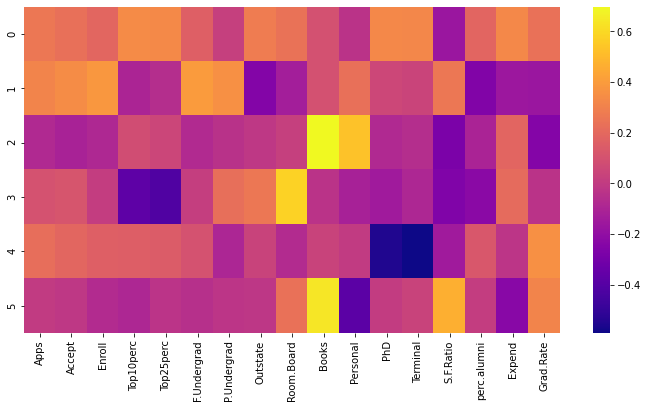

In [27]:
plt.figure(figsize = (12,6))
sns.heatmap(edu_comp, cmap = 'plasma')

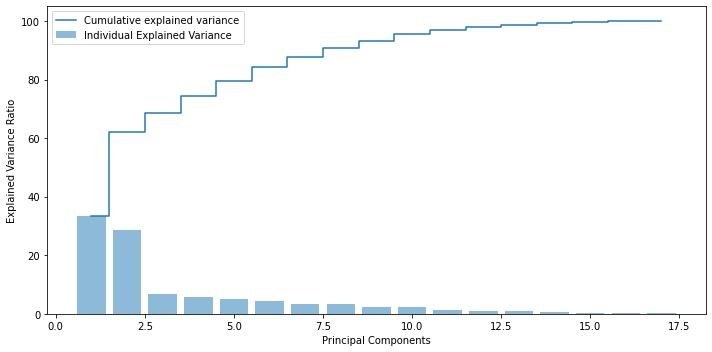

In [29]:
plt.figure(figsize = (10,5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual Explained Variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()